The first thing we have to do in this part is import the data. It is in a CSV format. 

This is a table of days on which incidents occured and the weather on that date taken from station number "725060".
Due to an error in importing dataset the initial dataset and experimentation only occured on the first thousand entries of the the dataset.

# Notes on other similar studies. 
There have been similar studies by other authors, such as by H. yang (2018) who did a similar study analysing weather and traffic data in new york, but failed to find any true corrlation between any weather variable and the number of collisions per hour. Though they did end up finding that collisions are much more likely to be correlated to the other drivers behavior than the weather. 

Another study by J davies (2023) done in the uk showed that rain and tempature was the greatest cause of deaths in driving accidents. While blumenshinelawgroup (2023) states that "More accidents occur when the roads are wet following a rainstorm than in any other type of bad weather. Wet roads account for 73 percent of all weather-related accidents." meaning that heavy percipitation should have a strong correlation with accidents.

In [ ]:
# import a CSV file of new york collisions and weather.
# ls will contain the data from the csv in a dataframe format that allows us to work with it using R.
ls <- read.csv("https://raw.githubusercontent.com/agronemic/19004547DAOTW/main/bquxjob_2dc43bd6_186c1785c31.csv", stringsAsFactors = TRUE)

Having opened the file, we can start to examine the contents. Note this command shows the first 6 records in the dataset.

In [ ]:
# examine the imported dataset
head(ls)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,999.9,78.1,53.1,0,999.9,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,999.9,48.0,21.0,0,999.9,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,999.9,50.0,37.9,0,999.9,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,999.9,84.0,64.9,0,999.9,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,999.9,88.0,57.0,0,999.9,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0,999.9,0,581


# Goals of the analysis and understanding of the meaning of the variables


The goals of the analysis is to see how the weather in new york affects the number on collisions per day in new york.

The weather variables being used are temp,	dewp,	slp,	visib,	wdsp,	mxpsd,	gust,	max,	min,	prcp,	sndp, and	fog.	
Here are the official descriptions for each of them

temp :Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

dewp : Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9

slp: Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9	

visib: Mean visibility for the day in miles to tenths. Missing = 999.9

wdsp: Mean wind speed for the day in knots to tenths. Missing = 999.9

mxpsd: Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

gust: Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

max: Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

min: Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

prcp: Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

sndp: Snow depth in inches to tenths--last report for the day if reported more thanonce. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

fog: Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

As you can see there is quite a bit of correlation between gust, mxpsd, and wdsp, as well as correlation between temp, max, and min. This correlation will be explored in greater depth later. One thing to note is that while correlated predictors can give misleading results they do not negatively affect the accuracy of the fit. 

# WDSP, Gust, and MXPSD colinearity
This gives us one more chance at making sure the wind variables can contribute to the final linear regression model. As each of these variables are based on recordings of windspeed. They should all show an amount of dependance on each other.

In [ ]:
cor(ls$gust, ls$wdsp,  method = "pearson")


[1] -0.5454553

In [ ]:
cor(ls$gust,  ls$mxpsd,  method = "pearson") 

[1] -0.07798863

In [ ]:
cor(ls$wdsp,  ls$mxpsd,  method = "pearson") 

[1] 0.1374787

As you can see the three variables show a very strong level of correlation with each other. The same can be assumed of temp, max, and min, which all relate to the tempature. According to stasticsbyjim (2023) multicolinearity does not affect how accurate the fit is so it might not be worth combining each factor into a single variable considering that each variable does not seem to have much of an impact on the number of collisions.

Using a summary we can see each piece important information about each variable and allows us to do a deeper analysis. Such as gauging the difference between max and min. The potential spread of each variable. The average and the median values. 
For example one can see on the snow data that the difference between max and min is 997, but the mean  and the median are at 999.6 and 999.9 respectively, meaning that despite the variance between max and min almost all the results are the same value. Further inspection of the snow depth field shows that only one result is not 999.9 making the field practically useless. 

Although not part of the summary one can see that the date, the day, the year, the month, and the day of the month are not suitable to use as variable for the analysis of the impact on the weather on collision incidents. As certain days such as holidays or fridays could have their own impact on the number of collisions in new york. 

Another thing to note is that the number of collisions on a date has a very large spread. With a medium and mean of about 550 each, and a min and max of 94 and 1164 respectively. Meaning that any r^2 result would probably present as very low despite a high significance due to the large spread. 




In [ ]:
summary(ls)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.998   Mean   :2016   Mean   : 6.652   Mean   :15.68  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp               slp       
 2014-02-28:   2   Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 2014-03-01:   2   1st Qu.:41.20   1st Qu.:   32.50   1st Qu.: 1012  
 2014-03-02:   2   Median :52.40   Median :   45.50   Median : 1017  
 2014-03-03:   2   Mean   :52.12   Mean   :   47.63   Mean   : 1190  
 2014-03-04:   2   3rd Qu.:64.50   3rd Qu.:   58.80   3rd Qu.: 1022  
 2014-03-05:   2   Max.   :86.70   Max.   : 9999.90   Max.  

In order to get some more meaningful information from the data it is useful to look at the relationship between the variables. A good way to do this is using graphics. A variety of graphics will be created trying to find any correlation between the weather and the number of accidents on a given day.


In [ ]:
nrow(ls) 

[1] 3165

# Initial plotting

This allows us to look into the data for any signs of correlation between other variables and the number of collisions

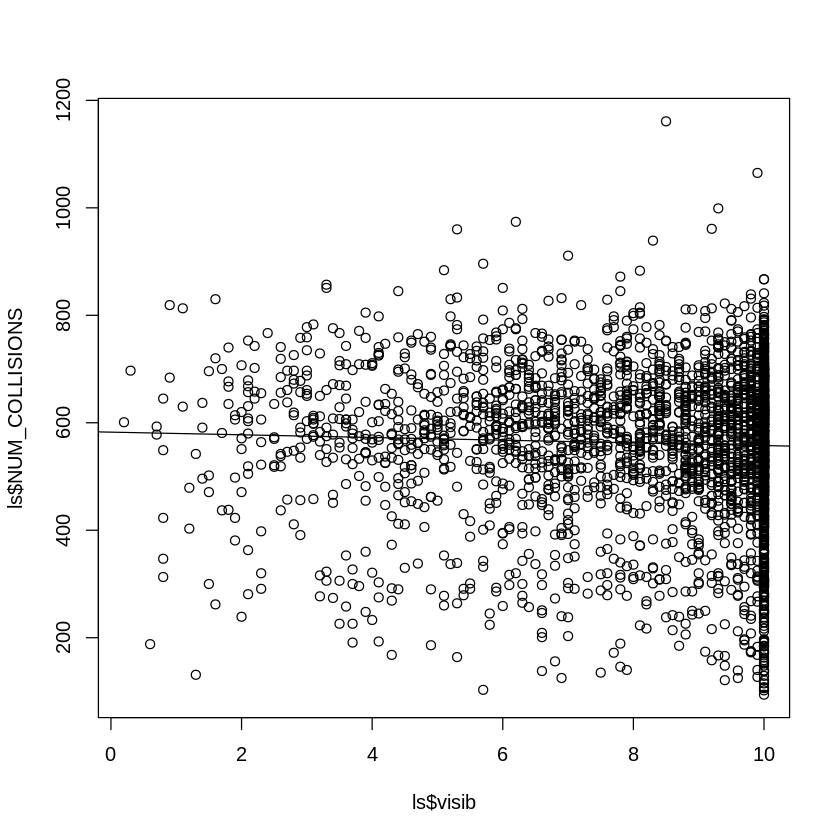

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$NUM_COLLISIONS ~ ls$visib)
abline(lm(ls$NUM_COLLISIONS ~  ls$visib))

The graphical representation of the relationship between these two variables (above) shows a small negative correlation as visibility increases, and that there are more records the higher the visibility. Each circle on the plot represents the visibility and the number of accidents on a single day.

We can explore this further using statistical analysis. Although the relationship is not purely linear, a linear regression is a good place to begin statistical modelling. In R this uses the lm() function.


Our first plot shows us the number of collisions are most commonly 600, with more than 600 being much more rare as the number increases, but less rare with days with less than 600 recorded accidents, with a minor secondary spike at 300.
This also shows us a distribution that looks somewhat like a gausian distribution, though it is not distributed fully equally. 

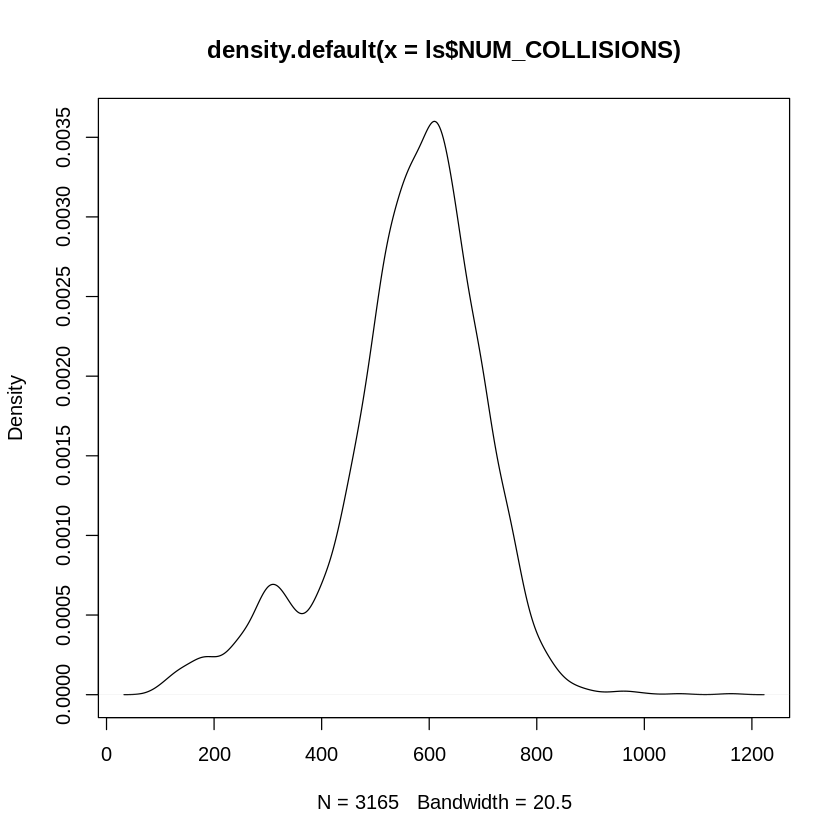

In [ ]:
plot(density(ls$NUM_COLLISIONS))

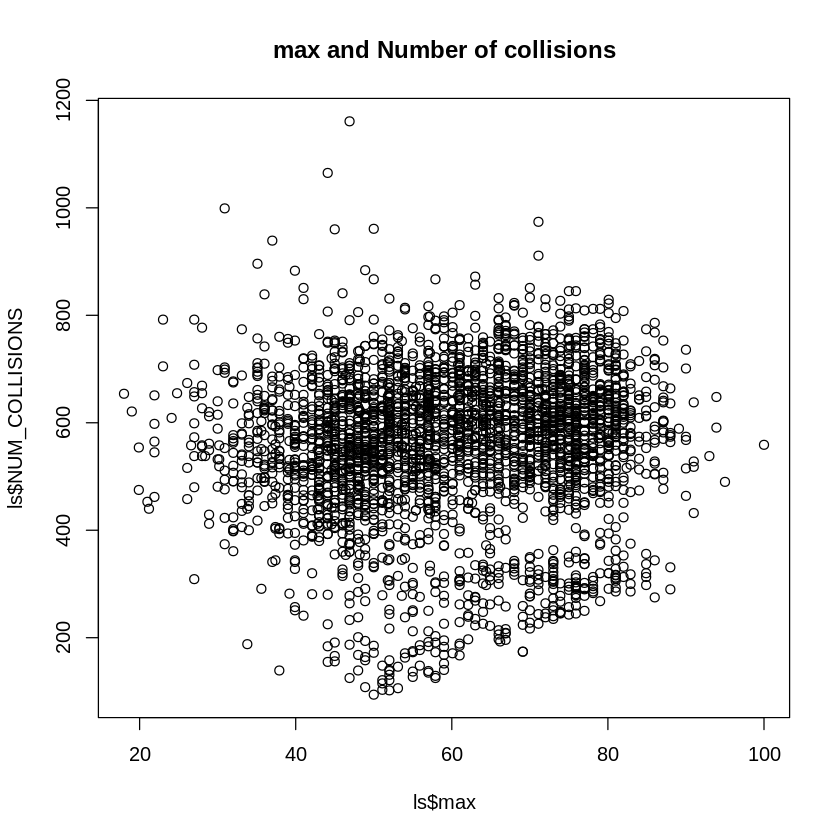

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$max, ls$NUM_COLLISIONS,  main="max and Number of collisions")

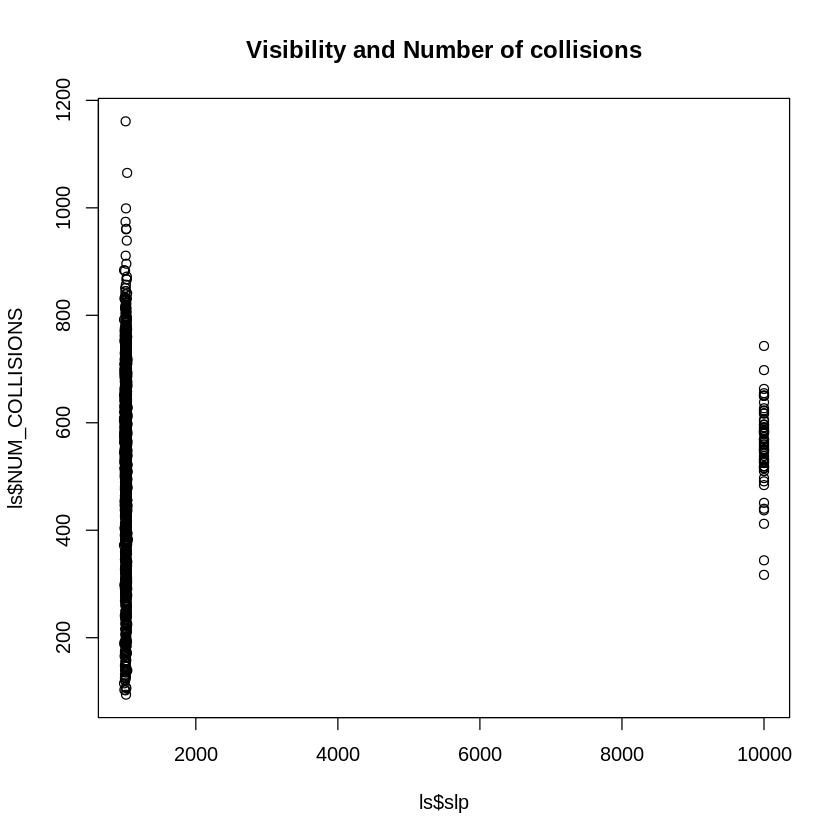

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$slp, ls$NUM_COLLISIONS,  main="Visibility and Number of collisions")

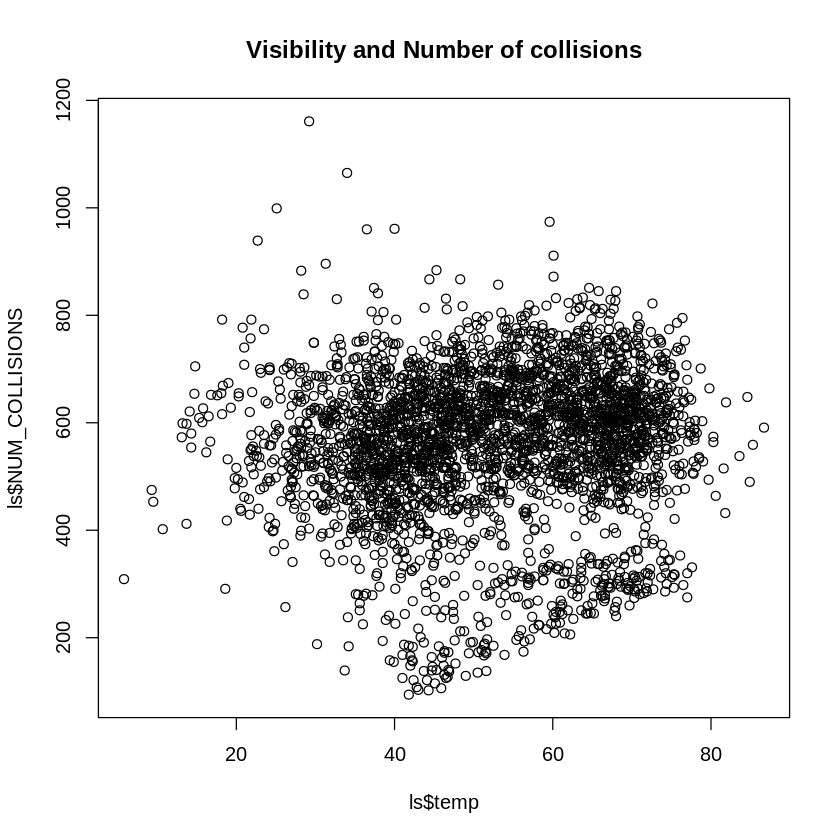

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$temp, ls$NUM_COLLISIONS,  main="Visibility and Number of collisions")

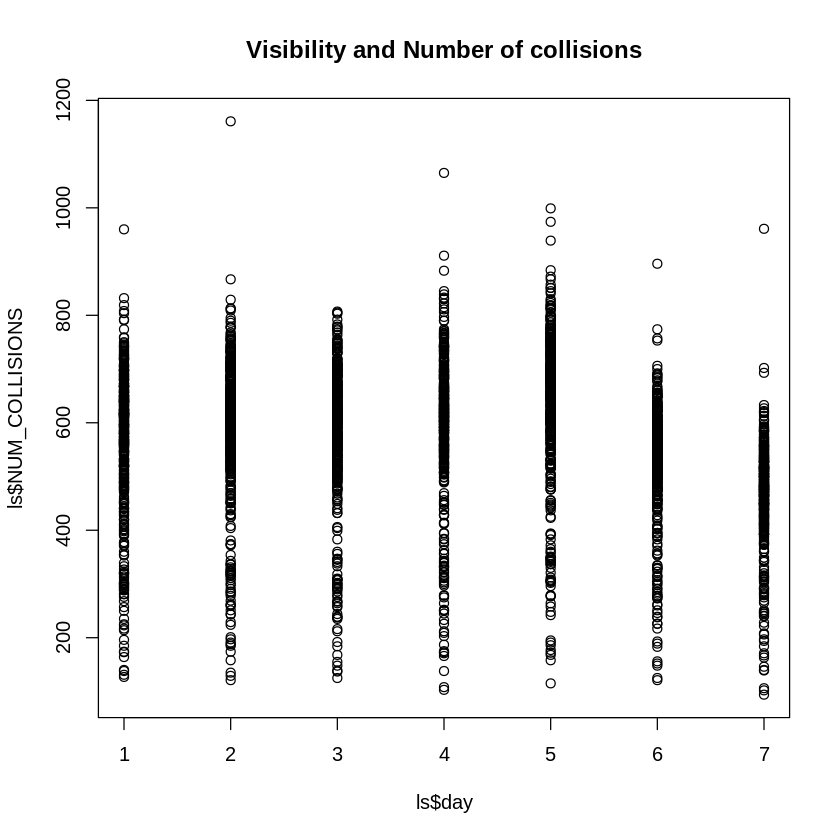

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$day, ls$NUM_COLLISIONS,  main="Visibility and Number of collisions")

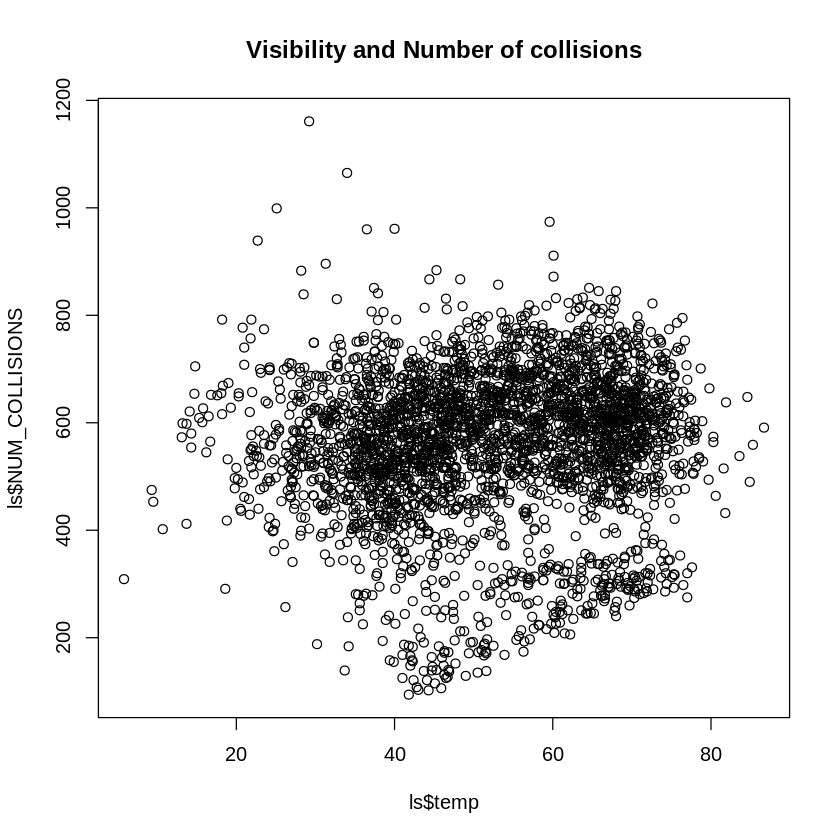

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$temp, ls$NUM_COLLISIONS,  main="Visibility and Number of collisions")

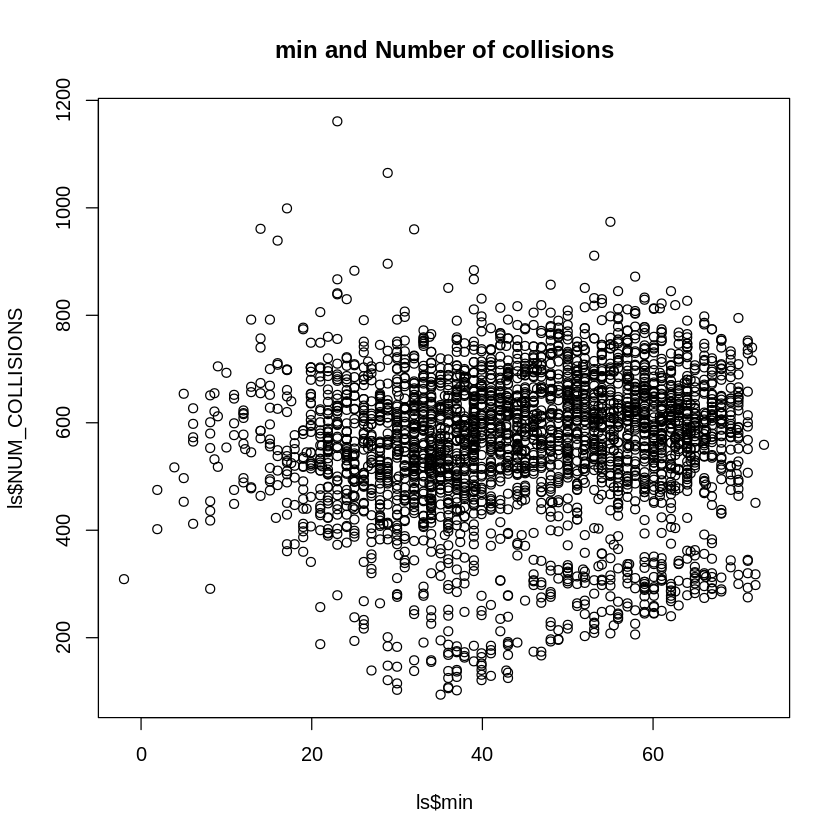

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$min, ls$NUM_COLLISIONS,  main="min and Number of collisions")

# REGRESSION MODELING

**MXSP**

In [ ]:
results <- lm(ls$NUM_COLLISIONS ~ ls$mxpsd)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$mxpsd)

Residuals:
    Min      1Q  Median      3Q     Max 
-466.93  -63.02   18.14   88.98  598.86 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 560.10144    2.80763  199.49   <2e-16 ***
ls$mxpsd      0.09281    0.07863    1.18    0.238    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0004402,	Adjusted R-squared:  0.0001242 
F-statistic: 1.393 on 1 and 3163 DF,  p-value: 0.238


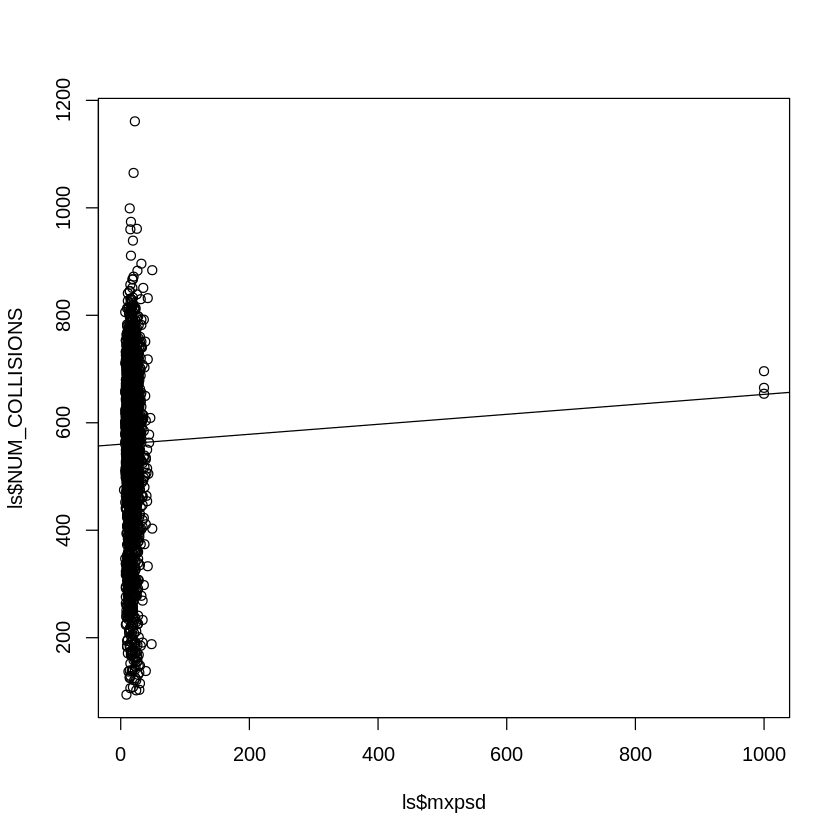

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$mxpsd)
abline(lm(ls$NUM_COLLISIONS ~ ls$mxpsd))

Some of the entries where the mxpsd is near 1000 may be outliers skewing the data and the results might be better if they were cleaned

**Fog**

In [ ]:
results <- lm(ls$NUM_COLLISIONS ~ ls$fog)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$fog)

Residuals:
    Min      1Q  Median      3Q     Max 
-466.62  -62.10   17.38   88.90  591.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  559.102      2.805 199.342   <2e-16 ***
ls$fog        10.514      5.561   1.891   0.0588 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.001129,	Adjusted R-squared:  0.000813 
F-statistic: 3.574 on 1 and 3163 DF,  p-value: 0.05877


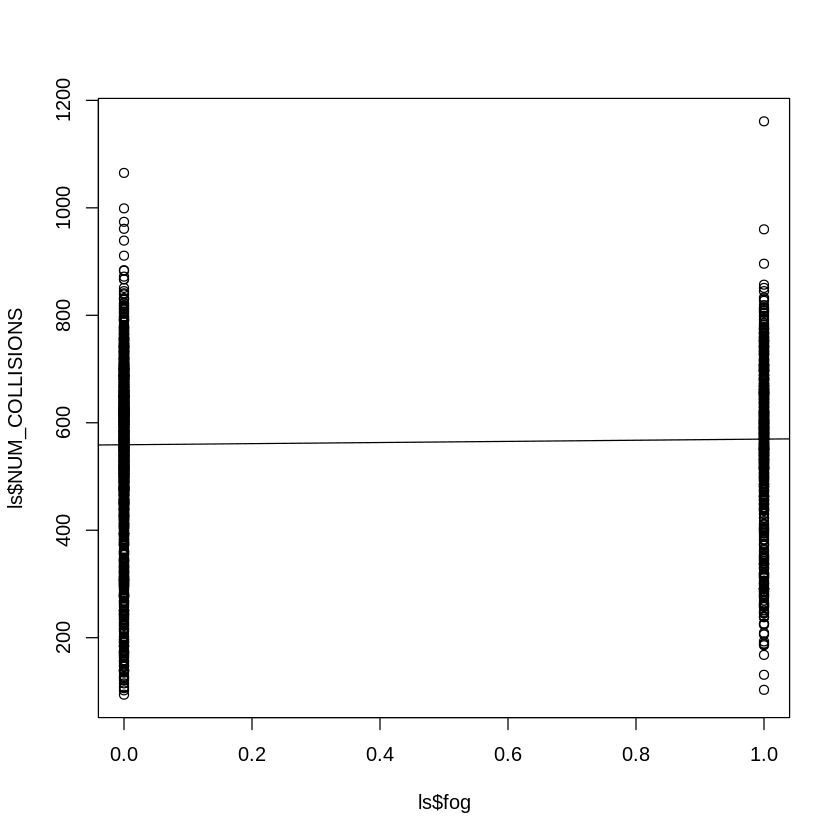

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$fog)
abline(lm(ls$NUM_COLLISIONS ~ ls$fog))

The binary nature of fog might make it harder to be used as a variable in linear regression, though it still might be very relevant.

**Snow depth**

In [ ]:
results <- lm(ls$NUM_COLLISIONS ~ ls$sndp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$sndp)

Residuals:
    Min      1Q  Median      3Q     Max 
-467.74  -63.74   18.26   88.26  599.26 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 688.4944   136.8461   5.031 5.15e-07 ***
ls$sndp      -0.1268     0.1369  -0.926    0.354    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0002711,	Adjusted R-squared:  -4.497e-05 
F-statistic: 0.8577 on 1 and 3163 DF,  p-value: 0.3544


Snow depth causes problems because it has so many missing entries that it is practically useless and needs to be removed. 

**gust**

In [ ]:
results <- lm(ls$NUM_COLLISIONS ~ ls$gust)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$gust)

Residuals:
    Min      1Q  Median      3Q     Max 
-468.29  -63.48   18.51   88.71  599.52 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.615e+02  3.118e+00 180.055   <2e-16 ***
ls$gust     8.332e-04  5.188e-03   0.161    0.872    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  8.154e-06,	Adjusted R-squared:  -0.000308 
F-statistic: 0.02579 on 1 and 3163 DF,  p-value: 0.8724


Gust has a p value of 0.06, giving it a moderate significance. It still has a lot of missing entries listed as "999.9" which might be skewing the results slightly. It might be better if the missing entries were recorded as zero instead. 

**Visib**

In [ ]:
results <- lm(ls$NUM_COLLISIONS ~ ls$visib)

In [ ]:
results


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$visib)

Coefficients:
(Intercept)     ls$visib  
    582.560       -2.497  


In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$visib)

Residuals:
    Min      1Q  Median      3Q     Max 
-465.32  -62.59   17.41   89.17  599.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  582.560      9.542  61.050   <2e-16 ***
ls$visib      -2.497      1.109  -2.252   0.0244 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.2 on 3163 degrees of freedom
Multiple R-squared:  0.0016,	Adjusted R-squared:  0.001285 
F-statistic:  5.07 on 1 and 3163 DF,  p-value: 0.02441


Visib has a p value 0f 0.3 which makes it completely worthless and will be taken out

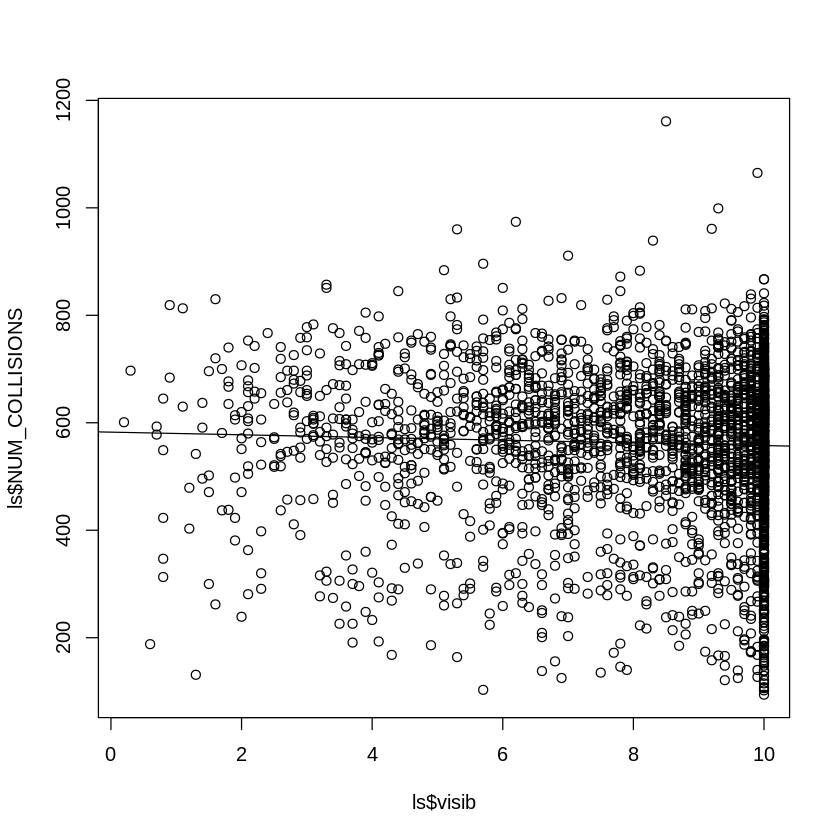

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$visib)
abline(lm(ls$NUM_COLLISIONS ~ ls$visib))

**MIN**

In [ ]:
results <- lm(ls$NUM_COLLISIONS ~ ls$min)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$min)

Residuals:
    Min      1Q  Median      3Q     Max 
-461.65  -61.18   17.21   88.71  613.27 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 532.6759     7.6918  69.252  < 2e-16 ***
ls$min        0.6545     0.1642   3.985  6.9e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136 on 3163 degrees of freedom
Multiple R-squared:  0.004996,	Adjusted R-squared:  0.004681 
F-statistic: 15.88 on 1 and 3163 DF,  p-value: 6.896e-05


With a p value of 0.03 this is relatively poor but still possibly relevant

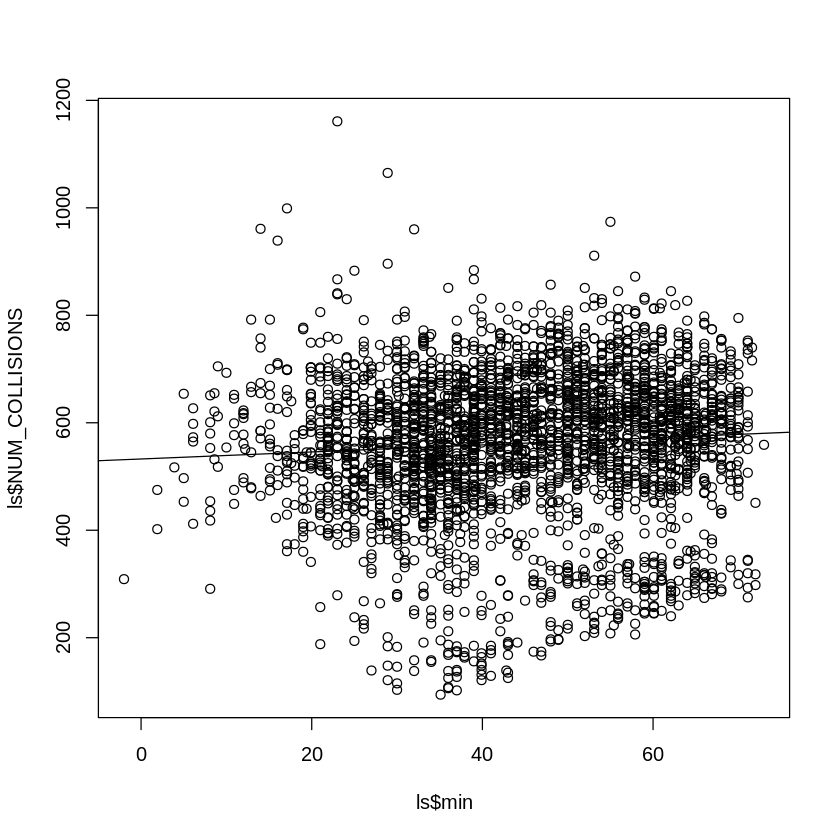

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$min)
abline(lm(ls$NUM_COLLISIONS ~ ls$min))

There seems to be a minor positive correlation between min and number of collisions. Although there is a large spread resulting in a low r^2 this is still significant. It is important to note that a poor accuracy in the form of r^2 does not mean that the variables are insignificant. 

**Wind speed**

In [ ]:
results <- lm(ls$NUM_COLLISIONS ~ ls$wdsp)

In [ ]:
summary(results)



Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$wdsp)

Residuals:
    Min      1Q  Median      3Q     Max 
-468.89  -63.40   18.03   88.94  599.82 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 564.4427     6.1815  91.311   <2e-16 ***
ls$wdsp      -0.2587     0.5516  -0.469    0.639    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  6.952e-05,	Adjusted R-squared:  -0.0002466 
F-statistic: 0.2199 on 1 and 3163 DF,  p-value: 0.6391


wind speed has a p value of 0.6 despite my thought that wind speed would correlate well. Unsure if this is some kind of error caused by carelessness or inexperience. Maybe data cleaning will fix this?

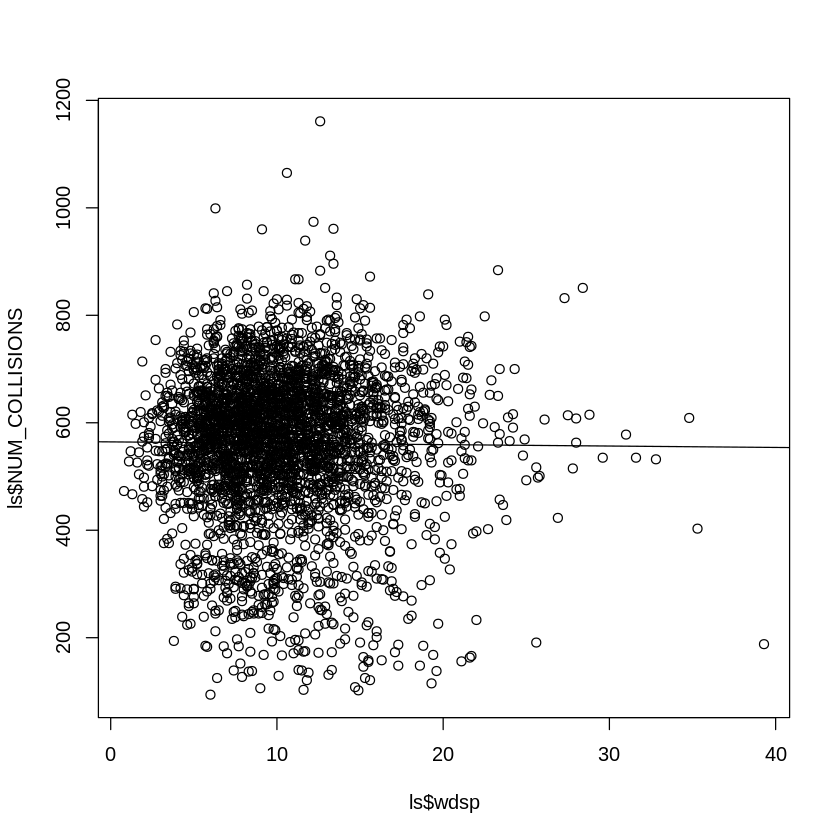

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$wdsp)
abline(lm(ls$NUM_COLLISIONS ~ ls$wdsp))

Unsure if this means there is any correlation present, or that higher wind speeds have no effect on the collisions in new york city. 

**Prcp**

In [ ]:
# Fitting a linear regression model
results <- lm(ls$NUM_COLLISIONS ~ ls$prcp)

In [ ]:
results


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$prcp)

Coefficients:
(Intercept)      ls$prcp  
   561.9710      -0.1108  


In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-467.97  -62.97   18.03   89.03  599.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 561.9710     2.4464  229.72   <2e-16 ***
ls$prcp      -0.1108     0.1908   -0.58    0.562    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0001065,	Adjusted R-squared:  -0.0002096 
F-statistic: 0.337 on 1 and 3163 DF,  p-value: 0.5616


A p value of 0.06 shows that percipitation has only a small corellation if any to the number of collisions

**Temp**

In [ ]:
# Fitting a linear regression model
results <- lm(ls$NUM_COLLISIONS ~ ls$temp)

In [ ]:
# Fitting a linear regression model
results


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp)

Coefficients:
(Intercept)      ls$temp  
    523.469        0.735  


In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-460.19  -61.43   17.40   88.03  616.07 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 523.4691     9.1464  57.232  < 2e-16 ***
ls$temp       0.7350     0.1693   4.342 1.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 135.9 on 3163 degrees of freedom
Multiple R-squared:  0.005926,	Adjusted R-squared:  0.005612 
F-statistic: 18.86 on 1 and 3163 DF,  p-value: 1.453e-05


With a P value of 0.005 this shows that temp is moderately correlated to number of collisions but isnt as significant as max

**MAX**

In [ ]:
# Fitting a linear regression model
results <- lm( ls$NUM_COLLISIONS ~ ls$max)

The below gives decent results with a p value of less than 0.002 suggesting a moderate connection between max and NUM_COLLISIONS

In [ ]:
# Display the results calculated above using the lm() function.
results


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max)

Coefficients:
(Intercept)       ls$max  
   514.0243       0.7939  


In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max)

Residuals:
    Min      1Q  Median      3Q     Max 
-459.72  -62.04   18.12   87.86  609.74 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 514.0243    10.3697  49.570  < 2e-16 ***
ls$max        0.7939     0.1677   4.735 2.29e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 135.9 on 3163 degrees of freedom
Multiple R-squared:  0.007039,	Adjusted R-squared:  0.006725 
F-statistic: 22.42 on 1 and 3163 DF,  p-value: 2.286e-06


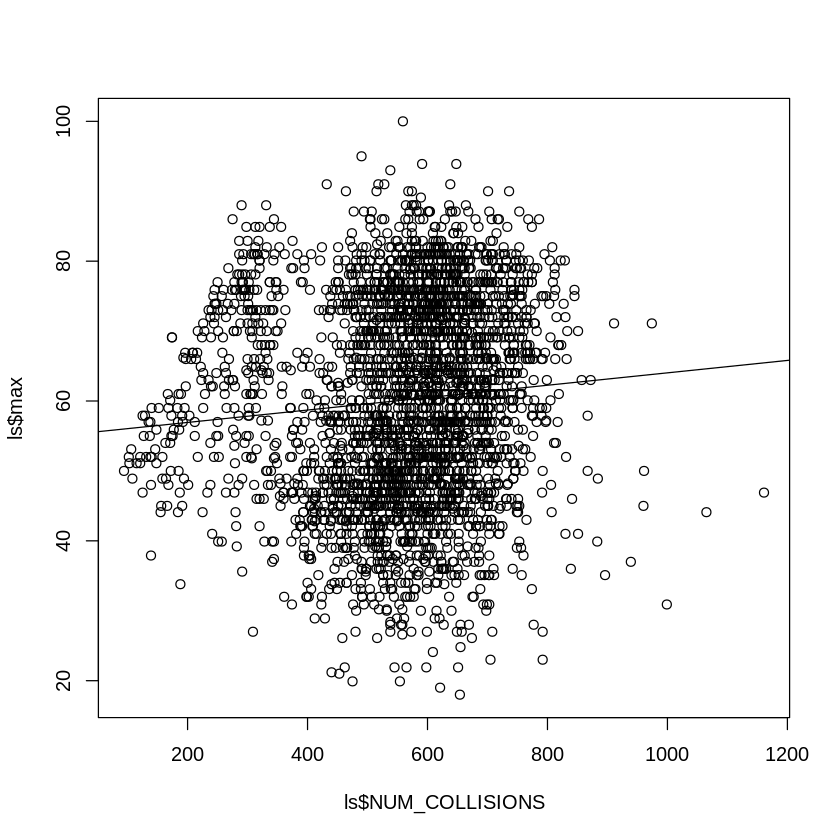

In [ ]:
plot(ls$max ~ ls$NUM_COLLISIONS) 
# draw line of best fit
abline(lm(ls$max ~ ls$NUM_COLLISIONS))

The statistical analysis confirms the relationship between the two variables. The P value shows a significance to 0.001. This is strongly significant. Meaning that max is highly correlated to num_collisions. The linear regression line also shows a positive correlation between max and the number of collisions. 

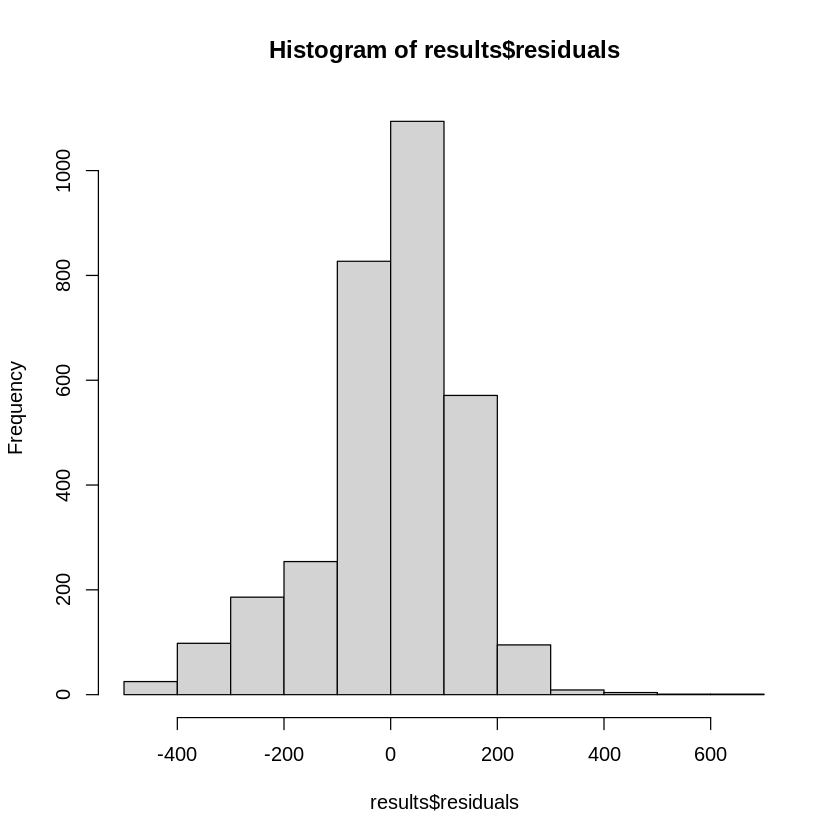

In [ ]:
hist(results$residuals, breaks =8)

Linear regression summary in order of significance. **Correct version using full amount of entries** 


1.   Max: Residual standard error: 135.9 on 3163 degrees of freedom
Multiple R-squared:  0.007039,	Adjusted R-squared:  0.006725 
F-statistic: 22.42 on 1 and 3163 DF,  p-value: 2.286e-06
2.  temp Residual standard error: 135.9 on 3163 degrees of freedom
Multiple R-squared:  0.005926,	Adjusted R-squared:  0.005612 
F-statistic: 18.86 on 1 and 3163 DF,  p-value: 1.453e-05

3.   min:Residual standard error: 136 on 3163 degrees of freedom
Multiple R-squared:  0.004996,	Adjusted R-squared:  0.004681 
F-statistic: 15.88 on 1 and 3163 DF,  p-value: 6.896e-05

4.   visib:Residual standard error: 136.2 on 3163 degrees of freedom
Multiple R-squared:  0.0016,	Adjusted R-squared:  0.001285 
F-statistic:  5.07 on 1 and 3163 DF,  p-value: 0.02441



5.   Snow depth:Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0002711,	Adjusted R-squared:  -4.497e-05 
F-statistic: 0.8577 on 1 and 3163 DF,  p-value: 0.3544

6. gust ("cleaned") Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0002652,	Adjusted R-squared:  -5.086e-05 
F-statistic: 0.8391 on 1 and 3163 DF,  p-value: 0.3597

7.   Prpc: Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0001065,	Adjusted R-squared:  -0.0002096 
F-statistic: 0.337 on 1 and 3163 DF,  p-value: 0.5616

8.   fog: Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.001129,	Adjusted R-squared:  0.000813 
F-statistic: 3.574 on 1 and 3163 DF,  p-value: 0.05877

9.   wdsp: Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  6.952e-05,	Adjusted R-squared:  -0.0002466 
F-statistic: 0.2199 on 1 and 3163 DF,  p-value: 0.6391





10.   gust (uncleaned): Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  8.154e-06,	Adjusted R-squared:  -0.000308 
F-statistic: 0.02579 on 1 and 3163 DF,  p-value: 0.8724

There are many interesting observations to note now that the full dataset is being used. One is that the "cleaned" version of gust (all entries that were once 999.9 are now 0) now offers better performance than the uncleaned version, and that now snow depth which has one entry that isnt "999.9" has given better results than half of the other variables. The multiple r squared value is incredibly low for each variable and the accuracy in general is lower despite the increased dataset size. For example the linear regressor for num_collisions ~ temp has had a 30% decrease in accuracy despite more results to train on. 

This low recorded accuracy and r squared is probably to do with the spread of recorded collision incidents as the recorded p value shows that the variables are still significant. The line of best fit might not reult in a good r^2 if the variables are spread out enough. 

Therefore variables should be assessed and ranked on p value, especially variables that show statistical significance of p being equal to or less than 0.05. These included variables are:
1.max 2. temp. 3. min. 4. visib. 

Additionally fog will be used despite that it barely avoids qualification on the basis that it still might provide increased accuracy. 






Regression summary in order of significance. **Incorrect version only using the first thousand entries** Obsverations can still be made despite the lower sample size.

1.   Max p value: 0.001 Residual standard error: 128.3 on 998 degrees of freedom
Multiple R-squared:  0.01072,	Adjusted R-squared:  0.009728 
2.  Temp p value: 0.005 Residual standard error: 128.5 on 998 degrees of freedom Multiple R-squared:  0.007697,	Adjusted R-squared:  0.006703
3.  min p value: 0.03 Residual standard error: Residual standard error: 128.7 on 998 degrees of freedom Multiple R-squared:  0.004473,	Adjusted R-squared:  0.003476 
4. gust p value: 0.063 Residual standard error: 128.7 on 998 degrees of freedom Multiple R-squared:  0.003457,	Adjusted R-squared:  0.002458

5. prcp p value: 0.06607 Residual standard error: 128.8 on 998 degrees of freedom

6. visib p value: 0.3 Residual standard error: 128.9 on 998 degrees of freedom Multiple R-squared:  0.001096,	Adjusted R-squared:  9.546e-05 
7.   wind speed p value: 0.9 Residual standard error: 129 on 998 degrees of freedom Multiple R-squared:  2.358e-05,	Adjusted R-squared:  -0.0009784
Judging on p value Wind speed should be taken out. However judging by residual standard error the values that give the most accurate results are visib and wind speed. 





# Plotting

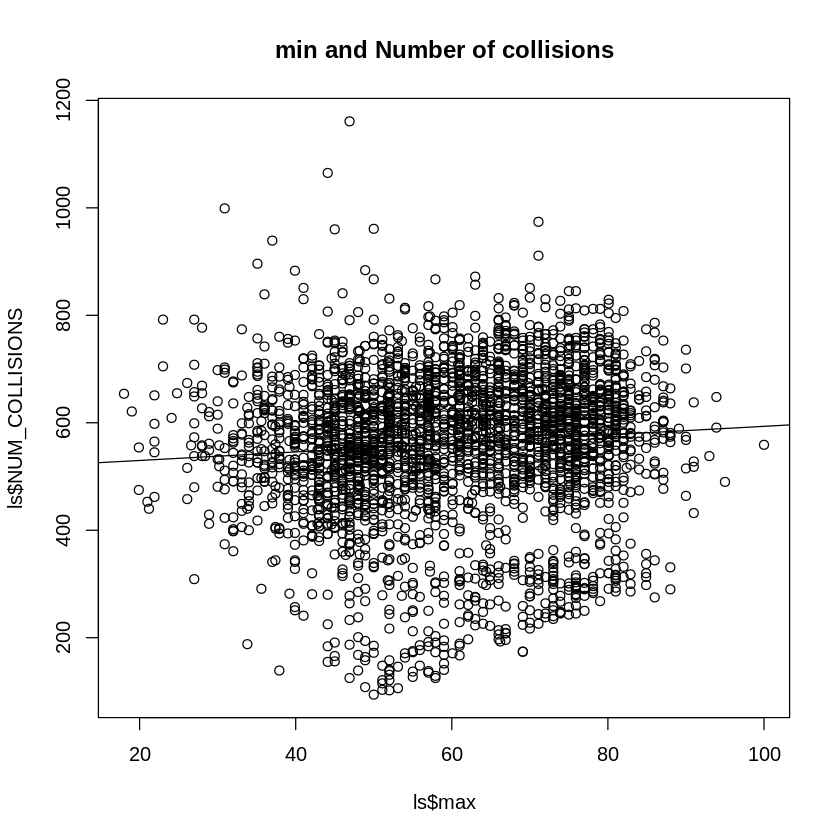

In [ ]:
# plot Value(happiness score) vs. GDPPerCapita
plot(ls$max, ls$NUM_COLLISIONS,  main="min and Number of collisions")
abline(lm(ls$NUM_COLLISIONS ~ ls$max))

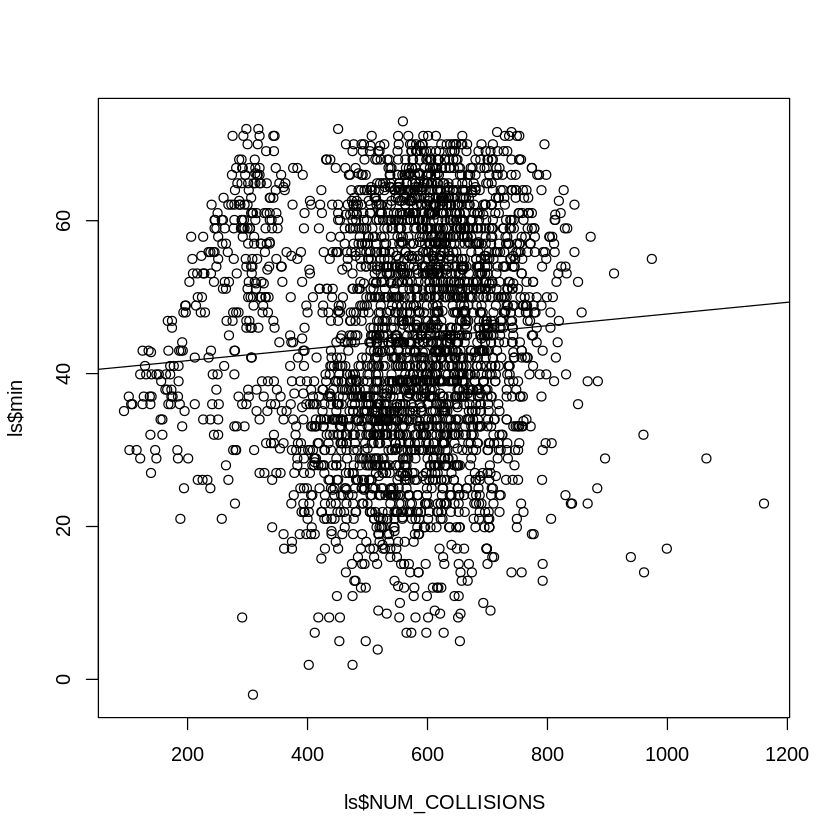

In [ ]:
plot( ls$NUM_COLLISIONS, ls$min)
# draw line of best fit
abline(lm(ls$min ~ ls$NUM_COLLISIONS))

In [ ]:
library(lattice)

# Correlation graphing

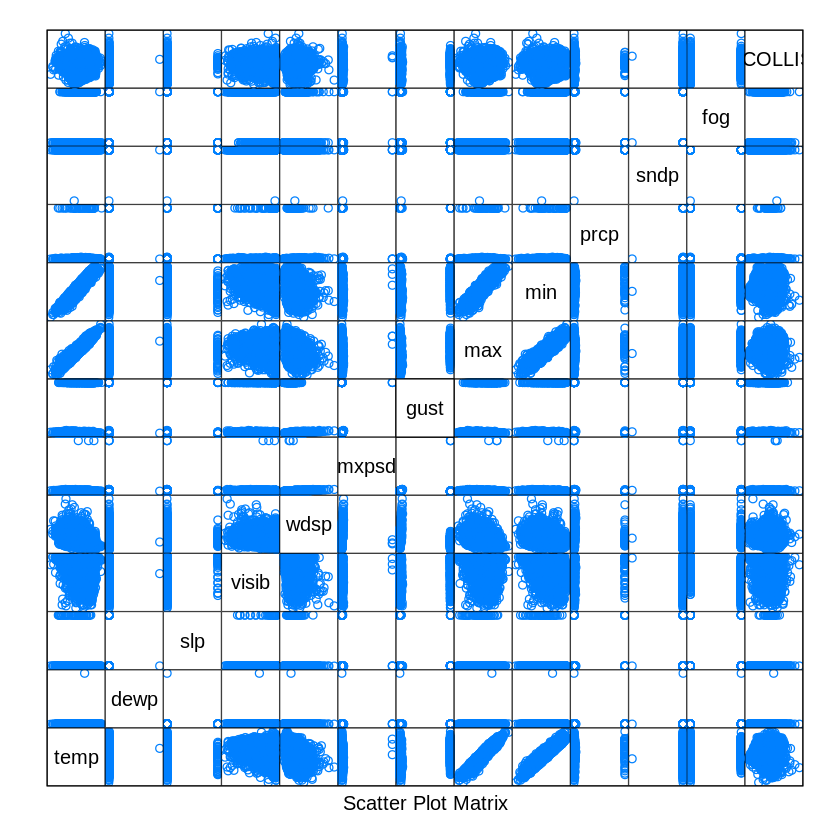

In [ ]:
splom(~ls[c(6:18)], groups=NULL, data=ls,
axis.line.tck=0, axis.text.alpha=0)

Using a correlation table might help find the correlation between variables. 
Unfortunately table shows almost no significant correlation between the weather variables and the number of collisions. Although the P numbers show that there is significance between variables. This is a severe problem, as no significant correlation makes it very hard to create a proper linear regression function. 

In [ ]:
cor(ls[, unlist(lapply(ls, is.numeric))]) 

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
day,1.000000e+00,-2.335486e-06,0.0001500444,0.0009376366,-0.005093567,0.0168704485,-0.004461160,0.01112846,0.001620786,-0.0006822257,-0.020313668,-0.0007316276,-0.008940918,-0.0019020705,-0.008907597,0.03058589,-0.188439049
year,-2.335486e-06,1.000000e+00,-0.0748649077,0.0055027957,-0.038328017,0.0144489597,-0.118396160,-0.04118184,0.167185682,-0.0083972026,0.071829001,-0.0236945964,-0.033913036,-0.0192968591,0.030311864,0.06161891,-0.256428428
mo,1.500444e-04,-7.486491e-02,1.0000000000,0.0129287340,0.378186184,0.0335787373,-0.093179016,0.06080324,-0.177340102,0.0007315296,0.077985881,0.3717603082,0.360644389,-0.0383855386,-0.022528716,-0.04682233,0.058687296
da,9.376366e-04,5.502796e-03,0.0129287340,1.0000000000,0.001765578,0.0106220447,-0.041710370,0.01161575,-0.007956740,-0.0365136792,-0.003882413,0.0055592622,0.002976757,-0.0415541787,0.013440911,-0.02239492,-0.030149908
temp,-5.093567e-03,-3.832802e-02,0.3781861841,0.0017655783,1.000000000,0.1004905729,-0.067018474,-0.20231004,-0.342195893,-0.0480223966,0.324770188,0.9706314291,0.964424713,0.0330532393,0.010982501,0.24267694,0.076982703
dewp,1.687045e-02,1.444896e-02,0.0335787373,0.0106220447,0.100490573,1.0000000000,-0.009808383,-0.04622106,-0.043921505,-0.0057780555,0.018524821,0.1026175815,0.097357697,0.0009306187,0.002183851,0.06294584,0.015871437
slp,-4.461160e-03,-1.183962e-01,-0.0931790160,-0.0417103700,-0.067018474,-0.0098083829,1.000000000,0.03125381,-0.042914220,-0.0083809905,-0.071529827,-0.0627112166,-0.065793795,0.4869154919,0.002501450,-0.03027674,-0.003682355
visib,1.112846e-02,-4.118184e-02,0.0608032365,0.0116157464,-0.202310040,-0.0462210631,0.031253807,1.00000000,-0.123579878,-0.0231517105,0.011156925,-0.1505038343,-0.242698739,-0.0422732898,-0.012035463,-0.70988240,-0.040005906
wdsp,1.620786e-03,1.671857e-01,-0.1773401021,-0.0079567401,-0.342195893,-0.0439215054,-0.042914220,-0.12357988,1.000000000,0.1374786532,-0.545455253,-0.3605591930,-0.283644456,0.0077530994,0.002870809,-0.07442699,-0.008337766
mxpsd,-6.822257e-04,-8.397203e-03,0.0007315296,-0.0365136792,-0.048022397,-0.0057780555,-0.008380990,-0.02315171,0.137478653,1.0000000000,-0.077988635,-0.0389334109,-0.036004108,0.0033969808,-0.007418757,0.02032076,0.020981387


probaly wont include the results below. 

In [ ]:
#an attempt at creating a p value table using rcorr from the hmisc libary. Not sure if other libaries are allowed
install.packages("Hmisc")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’




In [ ]:
library("Hmisc")
rcorr(as.matrix(ls[, unlist(lapply(ls, is.numeric))])) 


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




                 day  year    mo    da  temp  dewp   slp visib  wdsp mxpsd
day             1.00  0.00  0.00  0.00 -0.01  0.02  0.00  0.01  0.00  0.00
year            0.00  1.00 -0.07  0.01 -0.04  0.01 -0.12 -0.04  0.17 -0.01
mo              0.00 -0.07  1.00  0.01  0.38  0.03 -0.09  0.06 -0.18  0.00
da              0.00  0.01  0.01  1.00  0.00  0.01 -0.04  0.01 -0.01 -0.04
temp           -0.01 -0.04  0.38  0.00  1.00  0.10 -0.07 -0.20 -0.34 -0.05
dewp            0.02  0.01  0.03  0.01  0.10  1.00 -0.01 -0.05 -0.04 -0.01
slp             0.00 -0.12 -0.09 -0.04 -0.07 -0.01  1.00  0.03 -0.04 -0.01
visib           0.01 -0.04  0.06  0.01 -0.20 -0.05  0.03  1.00 -0.12 -0.02
wdsp            0.00  0.17 -0.18 -0.01 -0.34 -0.04 -0.04 -0.12  1.00  0.14
mxpsd           0.00 -0.01  0.00 -0.04 -0.05 -0.01 -0.01 -0.02  0.14  1.00
gust           -0.02  0.07  0.08  0.00  0.32  0.02 -0.07  0.01 -0.55 -0.08
max             0.00 -0.02  0.37  0.01  0.97  0.10 -0.06 -0.15 -0.36 -0.04
min            -0.01 -0.0

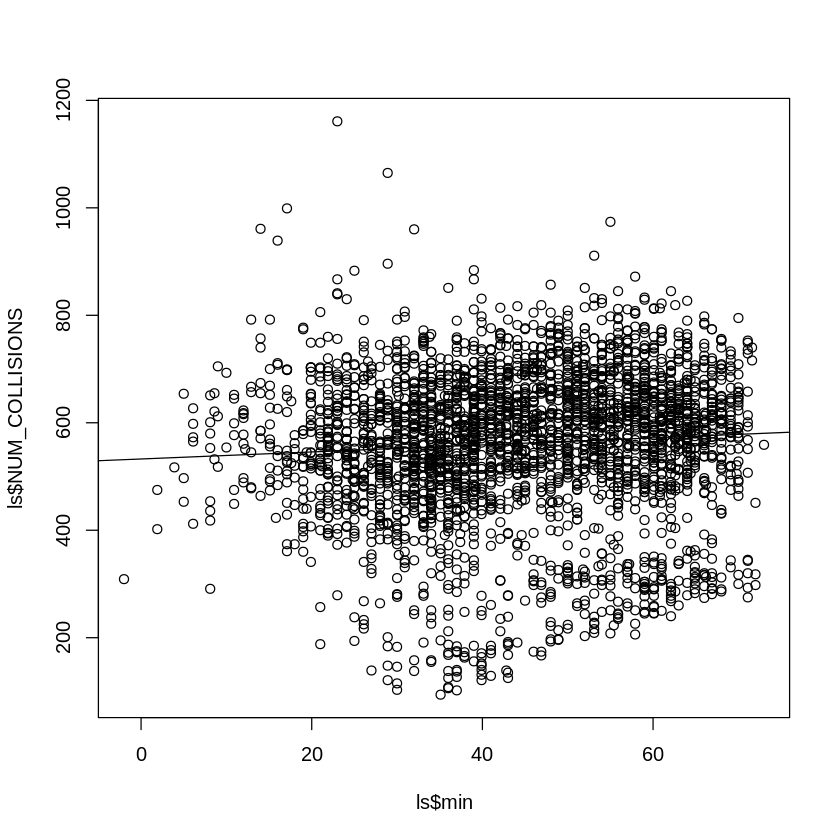

In [ ]:
plot( ls$min, ls$NUM_COLLISIONS)
# draw line of best fit
abline(lm(ls$NUM_COLLISIONS ~ ls$min))

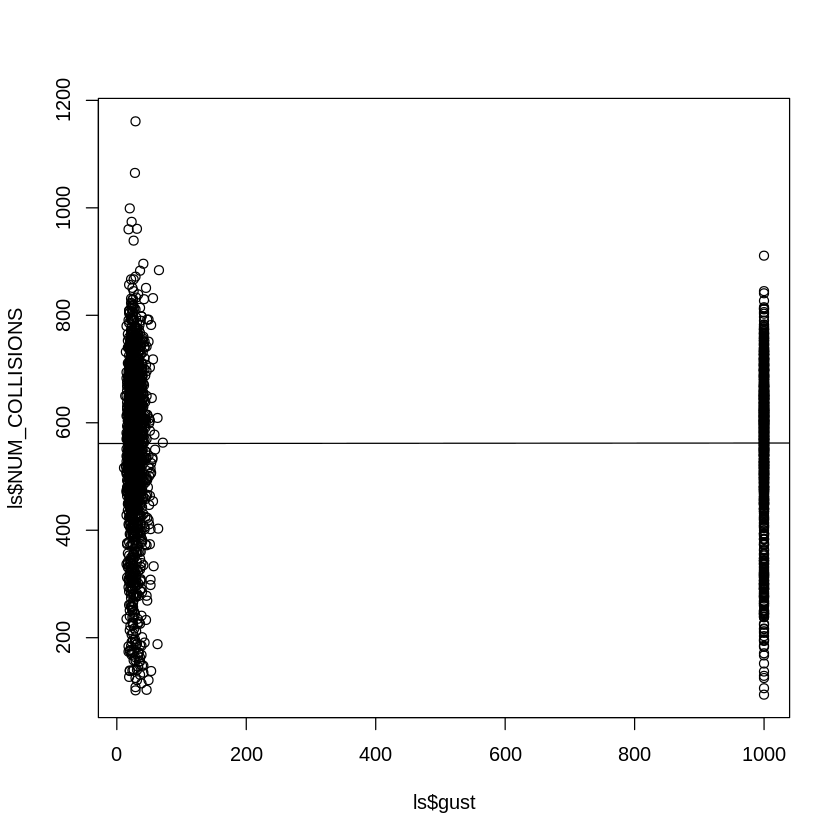

In [ ]:
plot( ls$gust, ls$NUM_COLLISIONS)
# draw line of best fit
abline(lm(ls$NUM_COLLISIONS ~ ls$gust))

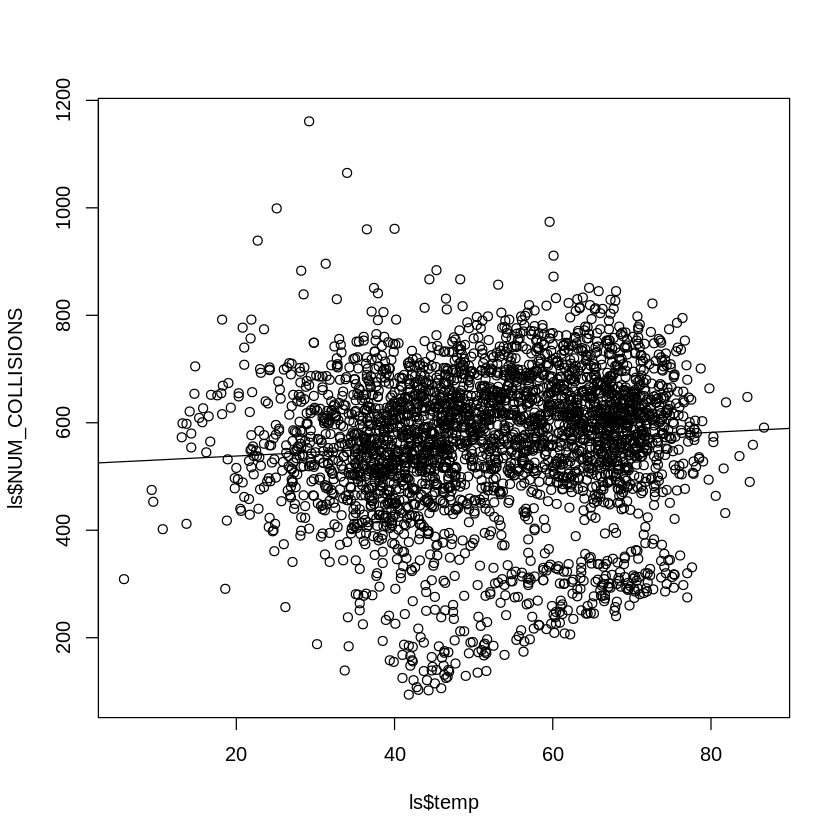

In [ ]:
plot( ls$temp, ls$NUM_COLLISIONS)
# draw line of best fit
abline(lm(ls$NUM_COLLISIONS ~ ls$temp))

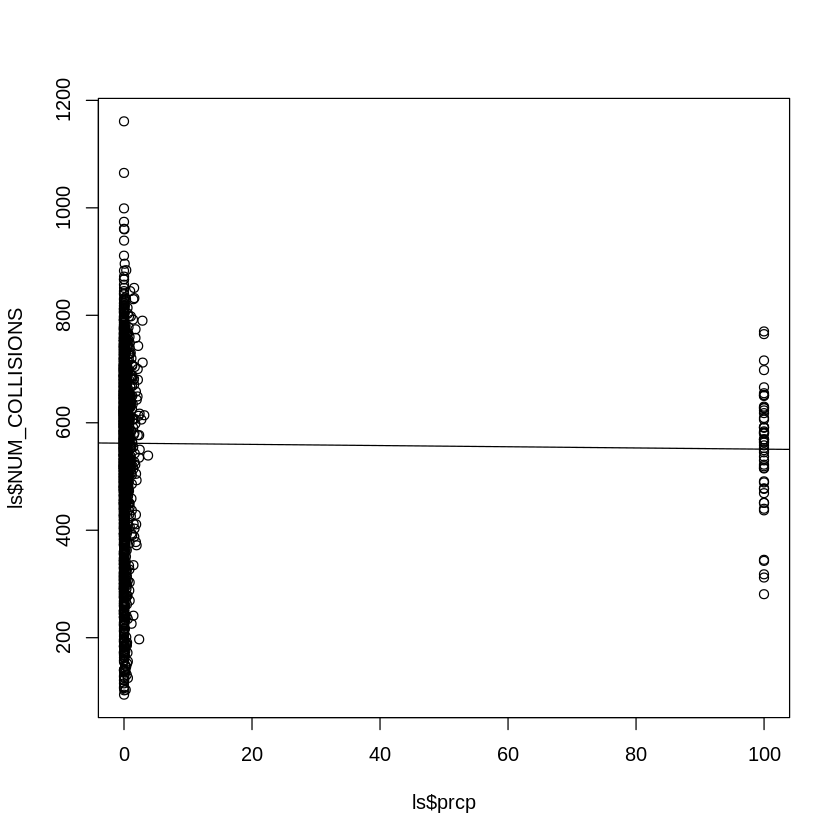

In [ ]:
plot(ls$prcp,  ls$NUM_COLLISIONS)
# draw line of best fit
abline(lm(ls$NUM_COLLISIONS ~ ls$prcp))

# Data cleaning
In this section i will attempt to clean the data giving a poor fit and with low accuracy and regression scores. Such as snow depth (to be removed), gust, wdsp, and mxpsp. As well as attempting to get a high r2 score. 

**Checking if the data types are faulty**

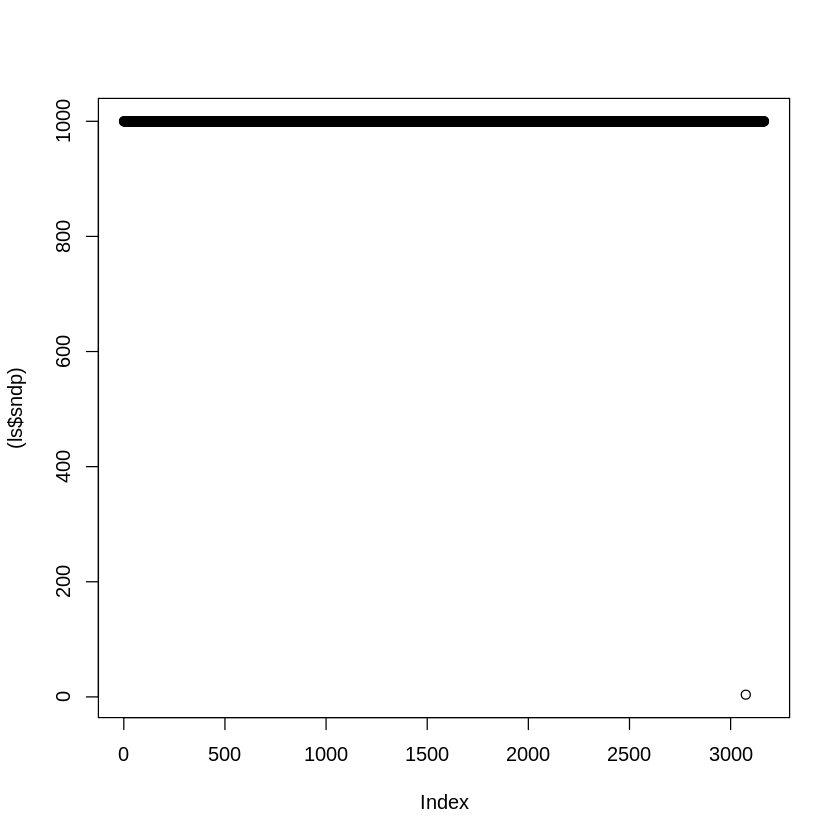

In [ ]:
plot((ls$sndp))

Snow level data is poor as the station 725060 where the data is taken from is incredibly poor at taking snow depth data and there is only one snow depth entry that isnt listed as "999.9". Meaning snow depth should be completely removed from the table.

In [ ]:
ls <- subset(ls, select = -c(sndp))

ls

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,999.9,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,999.9,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,999.9,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,999.9,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,999.9,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,999.9,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,999.9,77.0,66.9,0.00,1,347
9,2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,999.9,77.0,59.0,0.12,1,656


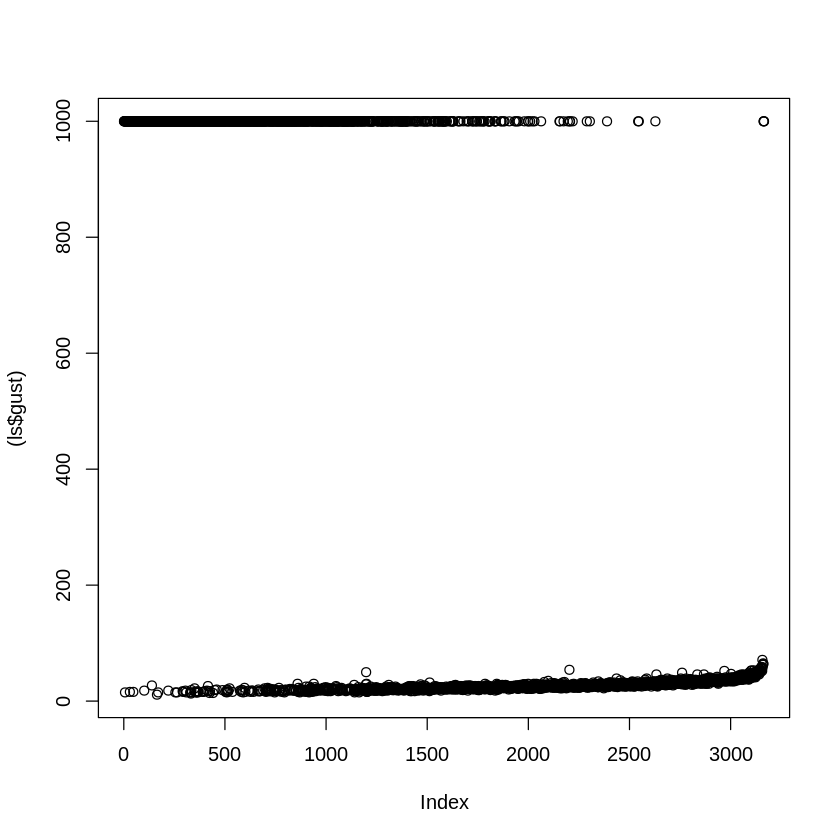

In [ ]:
plot((ls$gust))

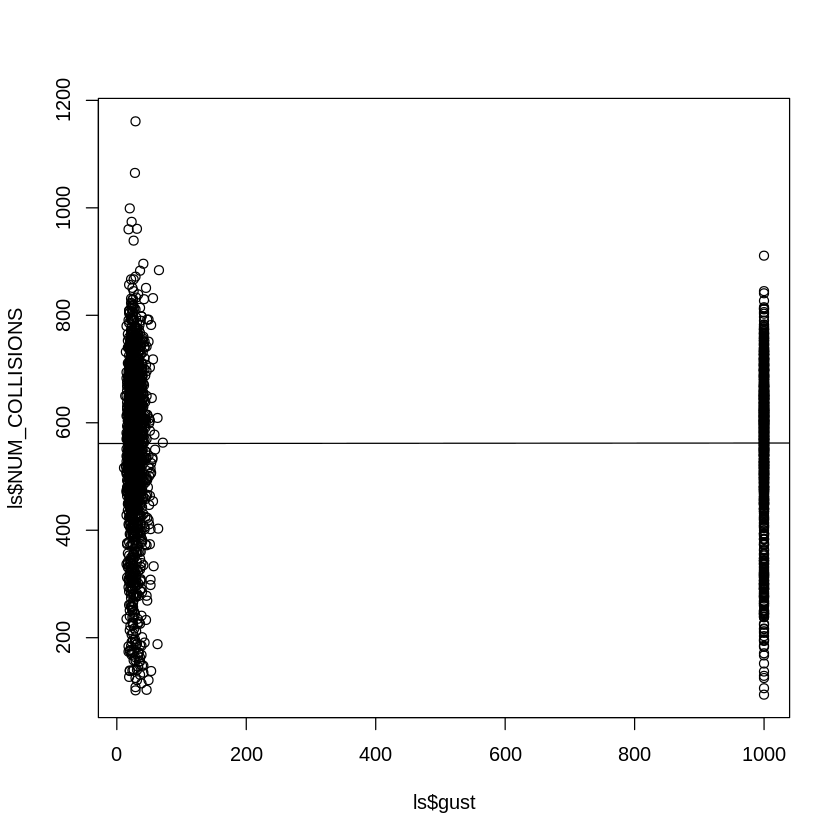

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$gust)
# draw line of best fit
abline(lm(ls$NUM_COLLISIONS ~ ls$gust))

**Gust cleaning**

Gust also has a very large amount of entries valued at "999.9" but more importantly they at least have 2000 entries that are between 0.1 and 999.8. Meaning that maybe gust would give less junk data if all the entries at 999.9 were replaced with zero. iF the same happened to snow depth the entire variable would become absolutely worthless. 

In [ ]:
ls$gust[ls$gust == 999.9] <- 0.0
ls

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
9,2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,656


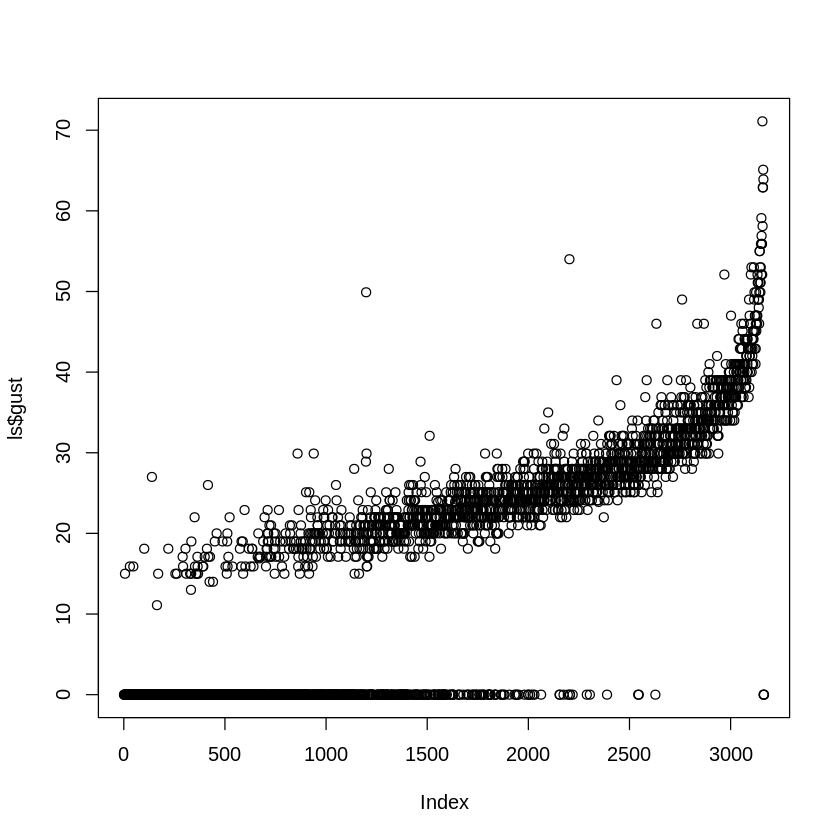

In [ ]:
plot(ls$gust)

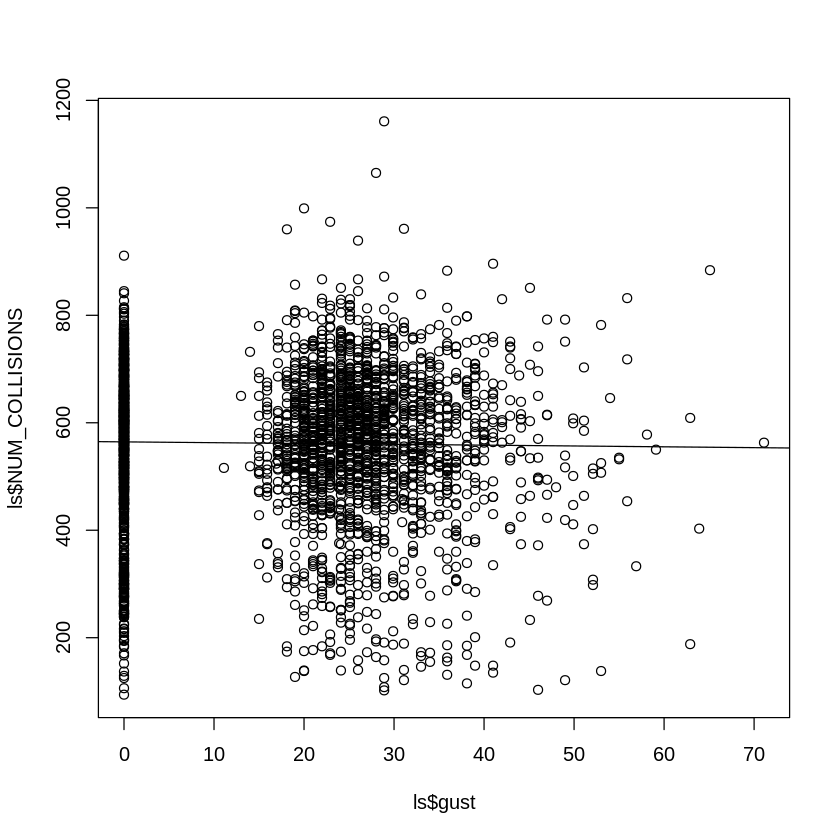

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$gust)
# draw line of best fit
abline(lm(ls$NUM_COLLISIONS ~ ls$gust))

In [ ]:
t

function (x) 
UseMethod("t")
<bytecode: 0x55574ecce9d0>
<environment: namespace:base>


The cleaned dust data looks much better on a graph, but at 1000 data entries actually performed worse. While strangely performing better at 3000 entries 



In [ ]:
results = lm(ls$NUM_COLLISIONS ~ ls$gust)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$gust)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.46  -62.46   18.17   88.84  600.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 564.4638     3.8054 148.334   <2e-16 ***
ls$gust      -0.1537     0.1678  -0.916     0.36    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0002652,	Adjusted R-squared:  -5.086e-05 
F-statistic: 0.8391 on 1 and 3163 DF,  p-value: 0.3597


The cleaned gust data offers marginally better results than the gust data, and still delivers poor results overall.

In [ ]:
typeof(ls$gust)

[1] "double"

https://www.investopedia.com/terms/p/p-value.asp


**Gust cleaning**

Gust also has a very large amount of entries valued at "999.9" but more importantly they at least have 2000 entries that are between 0.1 and 999.8. Meaning that maybe gust would give less junk data if all the entries at 999.9 were replaced with zero. iF the same happened to snow depth the entire variable would become absolutely worthless. 

In [ ]:
ls$mxpsd[ls$mxpsd == 999.9] <- 0.0
ls

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
9,2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,656


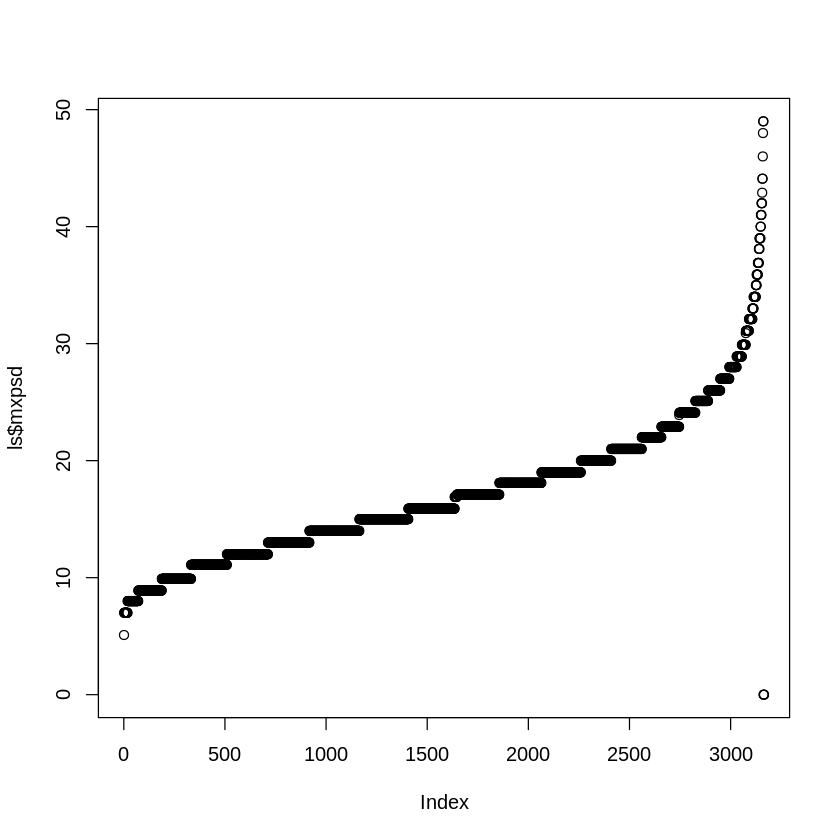

In [ ]:
plot(ls$mxpsd)

The above graph shows something unusual. That mxpsd is sorted by index number. 

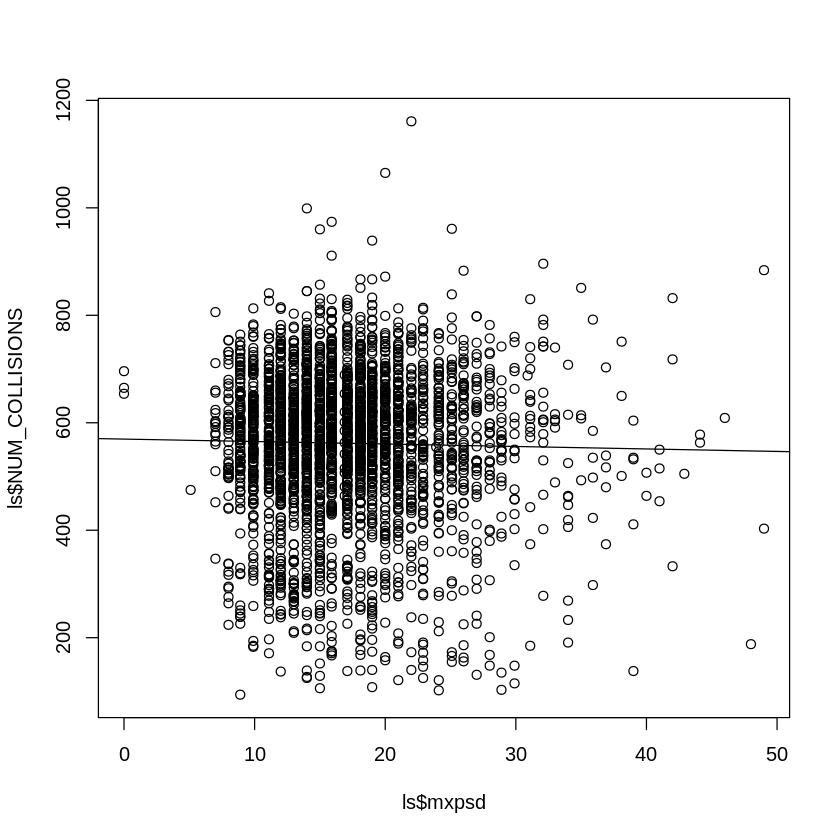

In [ ]:
plot(ls$NUM_COLLISIONS ~ ls$mxpsd)
# draw line of best fit
abline(lm(ls$NUM_COLLISIONS ~ ls$mxpsd))

Sadly mxpsd seems to not have a positive correlation with the number of traffic incidents in new york. 

In [ ]:
summary(lm(ls$NUM_COLLISIONS ~ ls$mxpsd))


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$mxpsd)

Residuals:
    Min      1Q  Median      3Q     Max 
-471.54  -63.08   17.88   88.69  601.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 569.6355     7.4171  76.800   <2e-16 ***
ls$mxpsd     -0.4598     0.4101  -1.121    0.262    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.3 on 3163 degrees of freedom
Multiple R-squared:  0.0003972,	Adjusted R-squared:  8.121e-05 
F-statistic: 1.257 on 1 and 3163 DF,  p-value: 0.2623


This also shows even less of a correlation than before. The original results were: Multiple R-squared:  0.0004402,	Adjusted R-squared:  0.0001242 
F-statistic: 1.393 on 1 and 3163 DF,  p-value: 0.238. As you can see each of the results were worsened by the alteration of the missing entries values. 


# Removing outliers


The first step is to visualise outliers using boxplots.

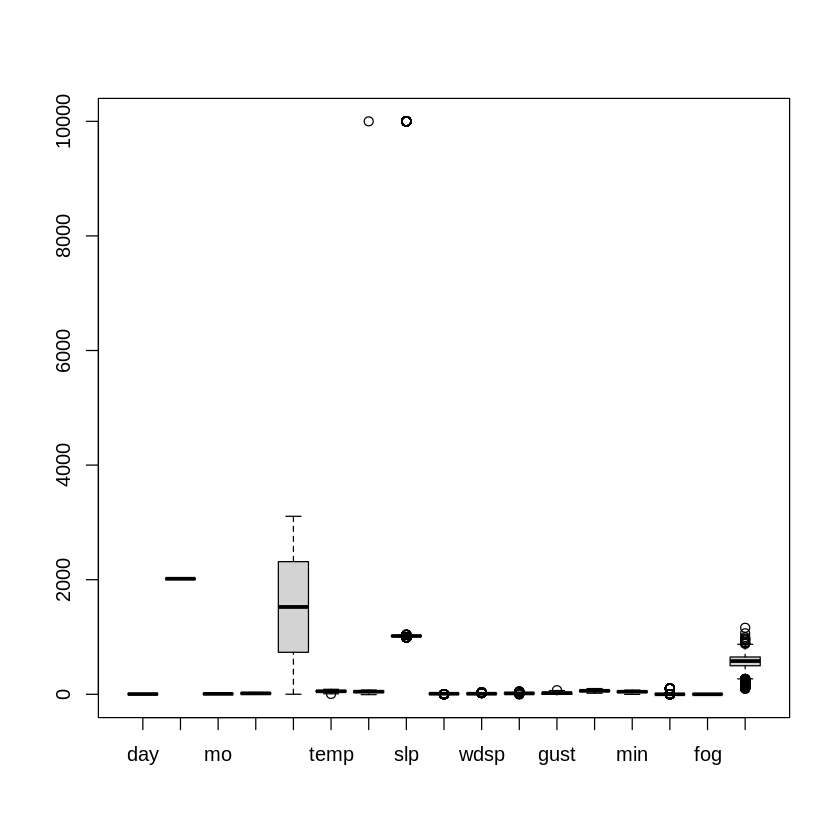

In [ ]:
boxplot(ls)

As can be seen there are plenty outliers in the NUM_COLLISION

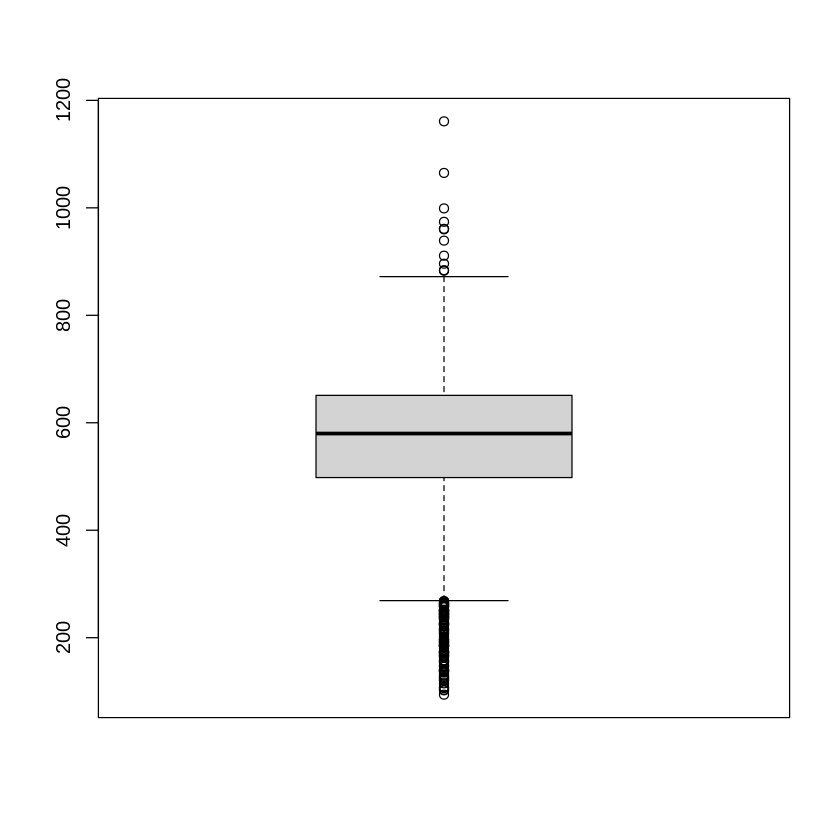

In [ ]:
boxplot(ls$NUM_COLLISIONS)

These are seeming all complete outliers by far, and removing them might standardise data and make its predictions much more accurate. 

In [ ]:
Q <- quantile(ls$NUM_COLLISIONS, probs=c(.25, .75), na.rm = FALSE)


In [ ]:
iqr <- IQR(ls$NUM_COLLISIONS)


In [ ]:
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range﻿

In [ ]:
eliminated<- subset(ls, ls$NUM_COLLISIONS > (Q[1] - 1.5*iqr) & ls$NUM_COLLISIONS < (Q[2]+1.5*iqr))


In [ ]:
eliminated

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
9,2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,656


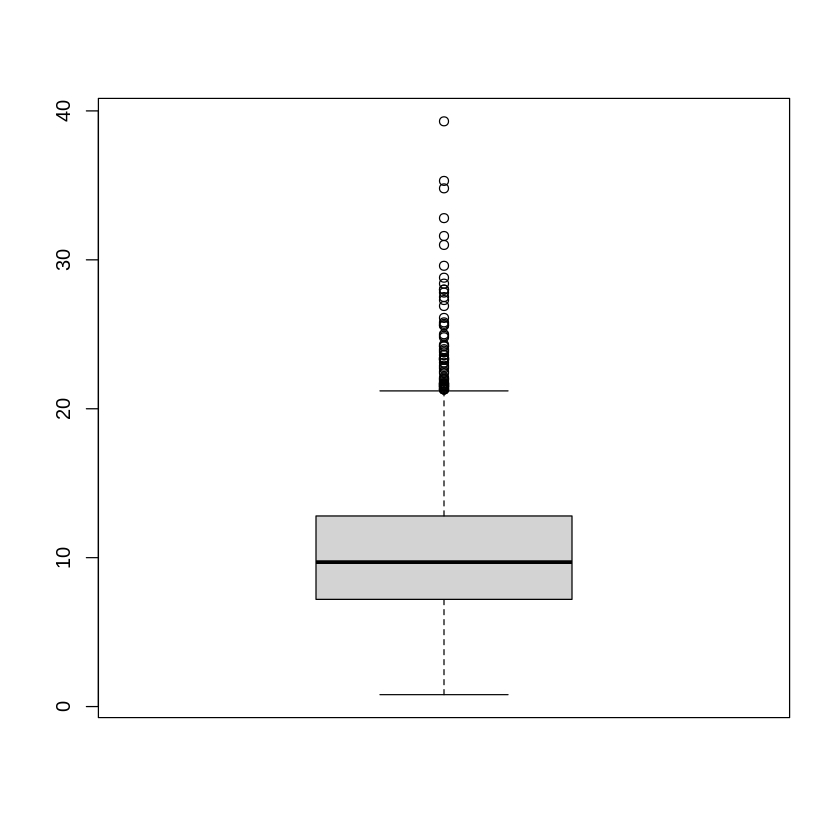

In [ ]:
boxplot(ls$wdsp)

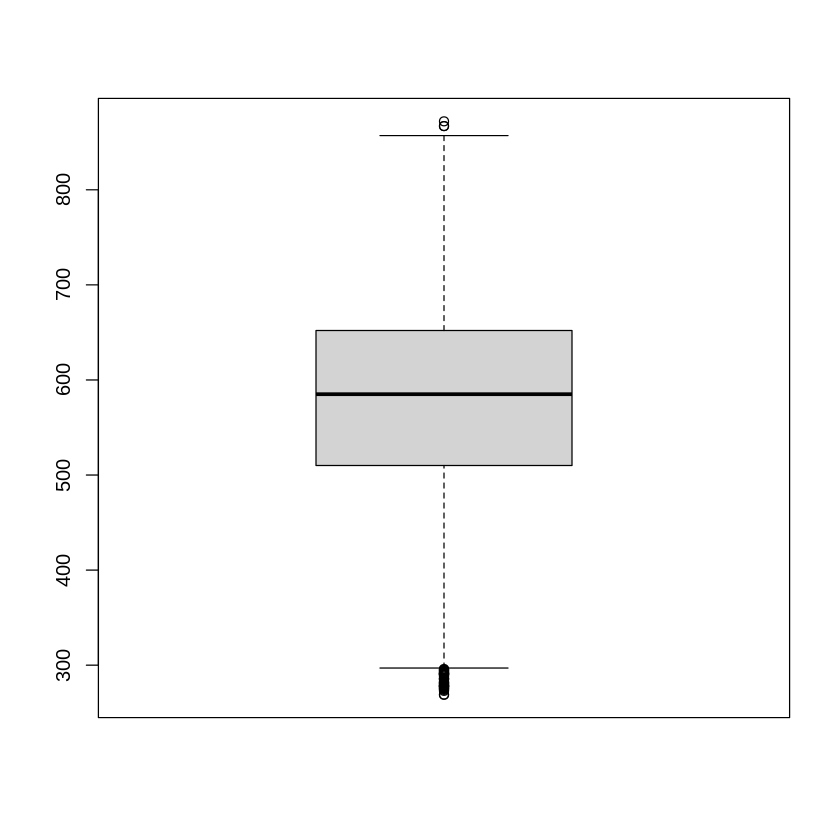

In [ ]:
boxplot(eliminated$NUM_COLLISIONS)

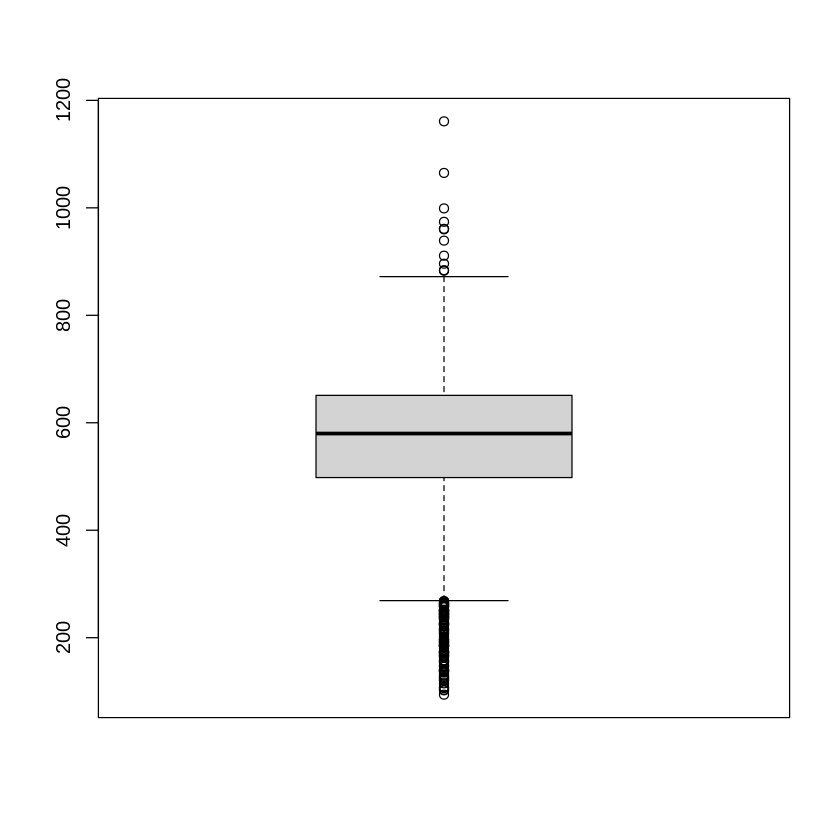

In [ ]:
boxplot(ls$NUM_COLLISIONS)

In [ ]:
summary(lm(eliminated$NUM_COLLISIONS ~ eliminated$temp))


Call:
lm(formula = eliminated$NUM_COLLISIONS ~ eliminated$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-317.28  -63.37    9.43   76.62  296.99 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     539.6771     7.7804  69.364  < 2e-16 ***
eliminated$temp   0.6831     0.1436   4.759 2.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.9 on 3026 degrees of freedom
Multiple R-squared:  0.007428,	Adjusted R-squared:  0.0071 
F-statistic: 22.65 on 1 and 3026 DF,  p-value: 2.039e-06


As can be seen eliminating the outliers gives much greater accuracy at last. Increasing the multiple r squared from around 0.005 to 0.007 which is a strong 40% increase in accuracy.  

In [ ]:
ls <- eliminated

In [ ]:
summary(lm(ls$NUM_COLLISIONS ~ ls$temp))


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-317.28  -63.37    9.43   76.62  296.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 539.6771     7.7804  69.364  < 2e-16 ***
ls$temp       0.6831     0.1436   4.759 2.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.9 on 3026 degrees of freedom
Multiple R-squared:  0.007428,	Adjusted R-squared:  0.0071 
F-statistic: 22.65 on 1 and 3026 DF,  p-value: 2.039e-06


Since the results are so good i will save the new data in github, and focus on data scaling and multiple regressor training afterwords on the new csv file.

In [ ]:
write.csv(ls, "New_york_collisions_version2.csv", row.names=FALSE)


# multiple variable linear regression

Import the version with all the above changes made but without standardisation below to test. 

In [ ]:
ls <- read.csv("https://raw.githubusercontent.com/agronemic/19004547DAOTW/main/New_york_collisions_version2.csv", stringsAsFactors = TRUE)

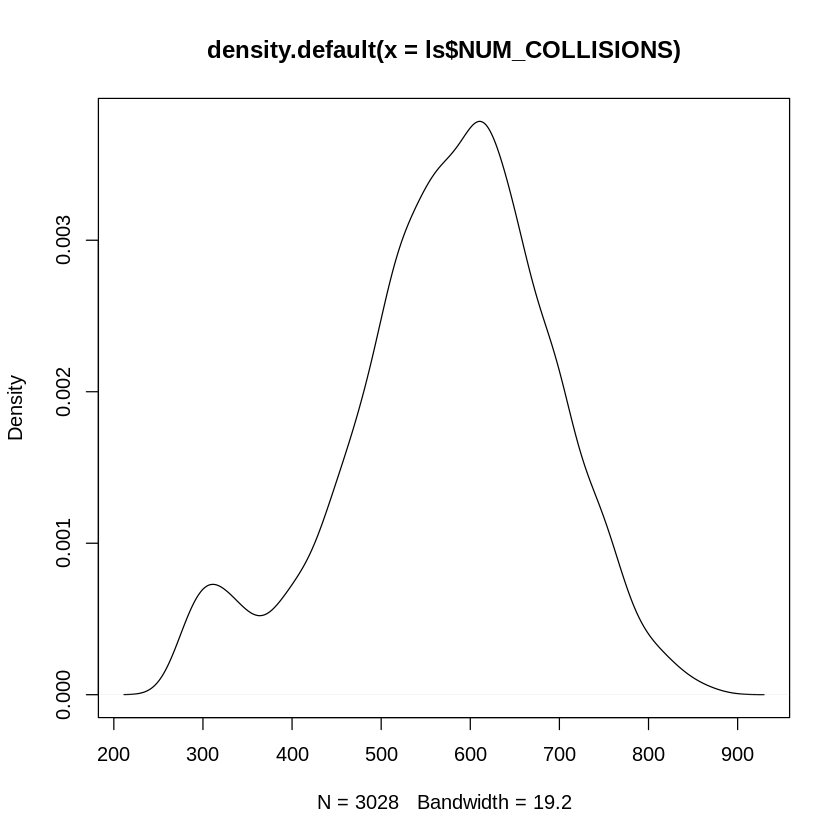

In [ ]:
plot(density(ls$NUM_COLLISIONS))

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$temp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-319.62  -63.27    9.76   76.61  301.01 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 525.4854     9.4781  55.442  < 2e-16 ***
ls$max        1.5628     0.5973   2.617  0.00893 ** 
ls$temp      -0.8477     0.6024  -1.407  0.15945    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3025 degrees of freedom
Multiple R-squared:  0.009669,	Adjusted R-squared:  0.009015 
F-statistic: 14.77 on 2 and 3025 DF,  p-value: 4.145e-07


Using the top two highest performing variables in a linear regression model gives much better results.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$gust + ls$min + ls$temp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$gust + ls$min + 
    ls$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-318.66  -64.43   10.06   76.56  297.79 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 509.5994    12.0804  42.184  < 2e-16 ***
ls$max        1.5745     0.6046   2.604  0.00925 ** 
ls$gust       0.3090     0.1579   1.958  0.05037 .  
ls$min       -0.5841     0.5410  -1.080  0.28043    
ls$temp      -0.1614     0.8664  -0.186  0.85227    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3023 degrees of freedom
Multiple R-squared:  0.01114,	Adjusted R-squared:  0.009833 
F-statistic: 8.515 on 4 and 3023 DF,  p-value: 7.889e-07


This combination of results gives a greater multiple r squared but a slightly higher p value .

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$min + ls$temp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$min + ls$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-318.67  -63.60    9.92   76.65  301.07 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 522.9285     9.9833  52.380   <2e-16 ***
ls$max        1.4930     0.6034   2.474   0.0134 *  
ls$min       -0.4374     0.5361  -0.816   0.4146    
ls$temp      -0.3450     0.8617  -0.400   0.6889    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3024 degrees of freedom
Multiple R-squared:  0.009887,	Adjusted R-squared:  0.008905 
F-statistic: 10.07 on 3 and 3024 DF,  p-value: 1.345e-06


This gives poor results as the multiple R-squared has actually decreased. 

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$min + ls$temp + ls$prcp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$min + ls$temp + 
    ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-319.37  -63.54   10.54   76.80  300.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 523.1137     9.9808  52.412   <2e-16 ***
ls$max        1.4883     0.6032   2.467   0.0137 *  
ls$min       -0.4295     0.5359  -0.801   0.4230    
ls$temp      -0.3403     0.8615  -0.395   0.6928    
ls$prcp      -0.2699     0.1594  -1.693   0.0906 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3023 degrees of freedom
Multiple R-squared:  0.01083,	Adjusted R-squared:  0.009516 
F-statistic: 8.271 on 4 and 3023 DF,  p-value: 1.244e-06


The residual standard error is still the same but the multiple r squared has decreased slightly. 



In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$min + ls$temp + ls$prcp + ls$fog)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$min + ls$temp + 
    ls$prcp + ls$fog)

Residuals:
    Min      1Q  Median      3Q     Max 
-320.30  -63.71   10.28   76.60  301.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 523.1501     9.9828  52.405   <2e-16 ***
ls$max        1.4929     0.6035   2.474   0.0134 *  
ls$min       -0.4479     0.5386  -0.832   0.4057    
ls$temp      -0.3390     0.8616  -0.393   0.6940    
ls$prcp      -0.2700     0.1594  -1.694   0.0904 .  
ls$fog        1.7072     4.9096   0.348   0.7281    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3022 degrees of freedom
Multiple R-squared:  0.01086,	Adjusted R-squared:  0.009228 
F-statistic: 6.639 on 5 and 3022 DF,  p-value: 3.713e-06


The same overall results. It seems the multiple R-squared score to beat is stil a very low 0.01.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$slp + ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp + ls$fog)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$dewp + ls$slp + 
    ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + 
    ls$prcp + ls$fog)

Residuals:
    Min      1Q  Median      3Q     Max 
-325.45  -62.48   10.69   76.77  290.74 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.151e+02  2.133e+01  24.147  < 2e-16 ***
ls$temp     -3.273e-02  8.711e-01  -0.038  0.97003    
ls$dewp      4.677e-03  1.141e-02   0.410  0.68205    
ls$slp       5.858e-04  1.895e-03   0.309  0.75728    
ls$visib    -2.372e+00  1.445e+00  -1.641  0.10089    
ls$wdsp      3.781e+00  9.279e-01   4.075 4.72e-05 ***
ls$mxpsd    -1.499e+00  8.889e-01  -1.686  0.09188 .  
ls$gust     -2.031e-02  2.821e-01  -0.072  0.94260    
ls$max       1.964e+00  6.177e-01   3.179  0.00149 ** 
ls$min      -1.088e+00  5.540e-01  -1.964  0.04959 *  
ls$prcp     -2.966e-01  1.834e-01  -1.618  0.10581    
ls$fog      -5.352e+00  6.954e+00  -0.770  0.44160    
---
Signif. codes: 

Using all possible variables the best results as of now. Removing variables like sea level pressure and fog will hopefully make it run better.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$slp + ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$dewp + ls$slp + 
    ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + 
    ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-325.92  -62.51   10.21   76.78  290.78 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 507.371807  18.799634  26.988  < 2e-16 ***
ls$temp       0.021585   0.868186   0.025  0.98017    
ls$dewp       0.004458   0.011411   0.391  0.69608    
ls$slp        0.000589   0.001895   0.311  0.75599    
ls$visib     -1.586088   1.023039  -1.550  0.12116    
ls$wdsp       3.844002   0.924227   4.159 3.28e-05 ***
ls$mxpsd     -1.496692   0.888853  -1.684  0.09231 .  
ls$gust      -0.017344   0.282067  -0.061  0.95097    
ls$max        1.903768   0.612700   3.107  0.00191 ** 
ls$min       -1.090511   0.553999  -1.968  0.04911 *  
ls$prcp      -0.293491   0.183294  -1.601  0.10944    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standa

This gives a slightly worse multiple r squared, and a slightly better adjusted r squared. No real accuracy gains have been noted though. 

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$dewp + ls$visib + 
    ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-325.85  -62.40   10.20   76.91  290.69 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 508.563355  18.401760  27.637  < 2e-16 ***
ls$temp       0.015088   0.867805   0.017  0.98613    
ls$dewp       0.004446   0.011409   0.390  0.69680    
ls$visib     -1.581125   1.022761  -1.546  0.12222    
ls$wdsp       3.833624   0.923485   4.151  3.4e-05 ***
ls$mxpsd     -1.516935   0.886331  -1.711  0.08710 .  
ls$gust      -0.009276   0.280828  -0.033  0.97365    
ls$max        1.904892   0.612597   3.110  0.00189 ** 
ls$min       -1.090421   0.553916  -1.969  0.04909 *  
ls$prcp      -0.265450   0.159524  -1.664  0.09621 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.4 on 3018 degrees of freedom
Multiple R-squared:  0.019

Removing sea level pressure improved: the results slightly further. Lastly wind speed will be removed

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$visib + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$dewp + ls$visib + 
    ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.93  -63.05    9.59   76.46  298.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 513.480174  18.412907  27.887  < 2e-16 ***
ls$temp      -0.234937   0.868037  -0.271  0.78668    
ls$dewp       0.003728   0.011438   0.326  0.74450    
ls$visib     -1.504358   1.025340  -1.467  0.14243    
ls$mxpsd      0.767892   0.696595   1.102  0.27040    
ls$gust       0.036311   0.281366   0.129  0.89733    
ls$max        1.728758   0.612767   2.821  0.00482 ** 
ls$min       -0.691127   0.546966  -1.264  0.20648    
ls$prcp      -0.299510   0.159741  -1.875  0.06089 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.7 on 3019 degrees of freedom
Multiple R-squared:  0.01361,	Adjusted R-squared:  0.01099 
F-statistic: 5.205 on 8 and 301

This has actually made the results much worse. Wind speed will be kept for now, and prehaps mxpsd and gust will be removed instead. 

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$wdsp + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$dewp + ls$wdsp + 
    ls$max + ls$min + ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.37  -62.94   11.02   76.32  290.07 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 482.438501  13.637758  35.375  < 2e-16 ***
ls$temp       0.092857   0.864674   0.107  0.91449    
ls$dewp       0.004709   0.011408   0.413  0.67977    
ls$wdsp       2.262318   0.516880   4.377 1.24e-05 ***
ls$max        1.725263   0.604208   2.855  0.00433 ** 
ls$min       -0.869168   0.543730  -1.599  0.11003    
ls$prcp      -0.283886   0.158988  -1.786  0.07427 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.5 on 3021 degrees of freedom
Multiple R-squared:  0.0171,	Adjusted R-squared:  0.01515 
F-statistic: 8.761 on 6 and 3021 DF,  p-value: 1.739e-09


The results have improved overall. The current lineup of variables seems like a decent selection, but maybe a smaller selection would perform better.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$wdsp + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$wdsp + ls$max + 
    ls$min + ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.33  -62.98   11.00   76.36  290.08 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 482.34741   13.63410  35.378  < 2e-16 ***
ls$temp       0.09185    0.86455   0.106  0.91540    
ls$wdsp       2.26043    0.51679   4.374 1.26e-05 ***
ls$max        1.73064    0.60398   2.865  0.00419 ** 
ls$min       -0.86772    0.54364  -1.596  0.11057    
ls$prcp      -0.28403    0.15897  -1.787  0.07408 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.4 on 3022 degrees of freedom
Multiple R-squared:  0.01705,	Adjusted R-squared:  0.01542 
F-statistic: 10.48 on 5 and 3022 DF,  p-value: 5.422e-10


Removing dewp gives this selection of variables which offers excellent results. I believe using this selection of variables, and perhaps removing min, along with standardisation of what is left, might give some better accuracy results. 

The below cells are just extra testing combinations. None of them offer anything as good as this current selection

Removing min results in poorer multiple r^2 and adjusted r^2 and thus min will be kept

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$wdsp + ls$max + ls$prcp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$wdsp + ls$max + 
    ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-323.01  -63.06   10.69   75.95  300.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 489.9908    12.7687  38.374  < 2e-16 ***
ls$temp      -0.9006     0.6008  -1.499  0.13400    
ls$wdsp       2.1084     0.5081   4.150 3.42e-05 ***
ls$max        1.8481     0.5996   3.082  0.00207 ** 
ls$prcp      -0.2852     0.1590  -1.794  0.07292 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.5 on 3023 degrees of freedom
Multiple R-squared:  0.01622,	Adjusted R-squared:  0.01492 
F-statistic: 12.46 on 4 and 3023 DF,  p-value: 4.704e-10


In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$max + ls$min + ls$temp + ls$visib + ls$fog)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$min + ls$temp + 
    ls$visib + ls$fog)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.69  -62.77    9.69   76.81  299.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 549.7784    15.2514  36.048  < 2e-16 ***
ls$max        1.8089     0.6179   2.927  0.00344 ** 
ls$min       -0.6228     0.5432  -1.147  0.25164    
ls$temp      -0.5012     0.8639  -0.580  0.56182    
ls$visib     -3.2482     1.3973  -2.325  0.02015 *  
ls$fog       -9.4597     6.8592  -1.379  0.16796    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.7 on 3022 degrees of freedom
Multiple R-squared:  0.01169,	Adjusted R-squared:  0.01006 
F-statistic: 7.151 on 5 and 3022 DF,  p-value: 1.162e-06


In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$max + ls$min + ls$temp + ls$visib)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$min + ls$temp + 
    ls$visib)

Residuals:
    Min      1Q  Median      3Q     Max 
-325.22  -62.70    9.46   76.85  302.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 538.7674    12.9966  41.455  < 2e-16 ***
ls$max        1.6930     0.6122   2.765  0.00572 ** 
ls$min       -0.6058     0.5431  -1.115  0.26478    
ls$temp      -0.4321     0.8626  -0.501  0.61642    
ls$visib     -1.9019     0.9998  -1.902  0.05724 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3023 degrees of freedom
Multiple R-squared:  0.01107,	Adjusted R-squared:  0.009763 
F-statistic: 8.461 on 4 and 3023 DF,  p-value: 8.725e-07


In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$max + ls$min + ls$temp + ls$visib)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$min + ls$temp + 
    ls$visib)

Residuals:
    Min      1Q  Median      3Q     Max 
-325.22  -62.70    9.46   76.85  302.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 538.7674    12.9966  41.455  < 2e-16 ***
ls$max        1.6930     0.6122   2.765  0.00572 ** 
ls$min       -0.6058     0.5431  -1.115  0.26478    
ls$temp      -0.4321     0.8626  -0.501  0.61642    
ls$visib     -1.9019     0.9998  -1.902  0.05724 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3023 degrees of freedom
Multiple R-squared:  0.01107,	Adjusted R-squared:  0.009763 
F-statistic: 8.461 on 4 and 3023 DF,  p-value: 8.725e-07


In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$max + ls$min + ls$temp)

In [ ]:
summary(results)


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$max + ls$min + ls$temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-318.67  -63.60    9.92   76.65  301.07 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 522.9285     9.9833  52.380   <2e-16 ***
ls$max        1.4930     0.6034   2.474   0.0134 *  
ls$min       -0.4374     0.5361  -0.816   0.4146    
ls$temp      -0.3450     0.8617  -0.400   0.6889    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.8 on 3024 degrees of freedom
Multiple R-squared:  0.009887,	Adjusted R-squared:  0.008905 
F-statistic: 10.07 on 3 and 3024 DF,  p-value: 1.345e-06


The values that give the best multiple r^2 value is max + min +temp + wdsp + prcp and thus i will continue using them. There is still the problem of not being able to achieve any good results using the full dataset, whereas the results achieved using the first 1000 entries were seemingly much better. 

# Removing outliers from other feature variables
Outliers will also be removed from other feature variables, chronologically this process has been done after the data has been scaled, and will be saved as version 3 if it is successful, and then it will be scaled using the methods used before

In [ ]:
ls <- read.csv("https://raw.githubusercontent.com/agronemic/19004547DAOTW/main/New_york_collisions_version2.csv", stringsAsFactors = TRUE)
ls

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,656


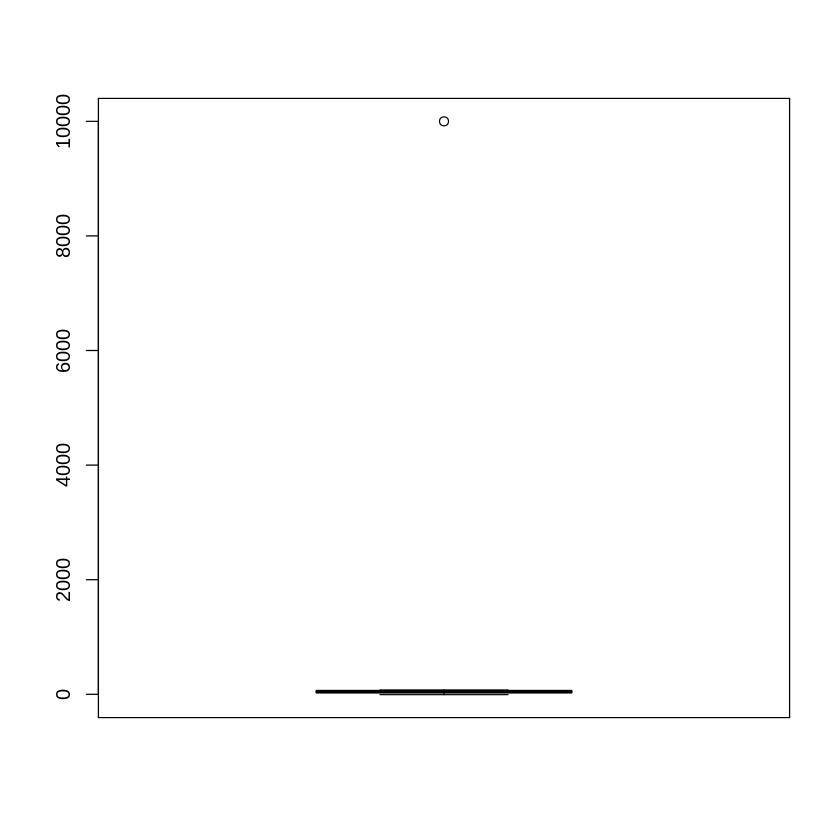

In [ ]:
boxplot(ls$dewp)

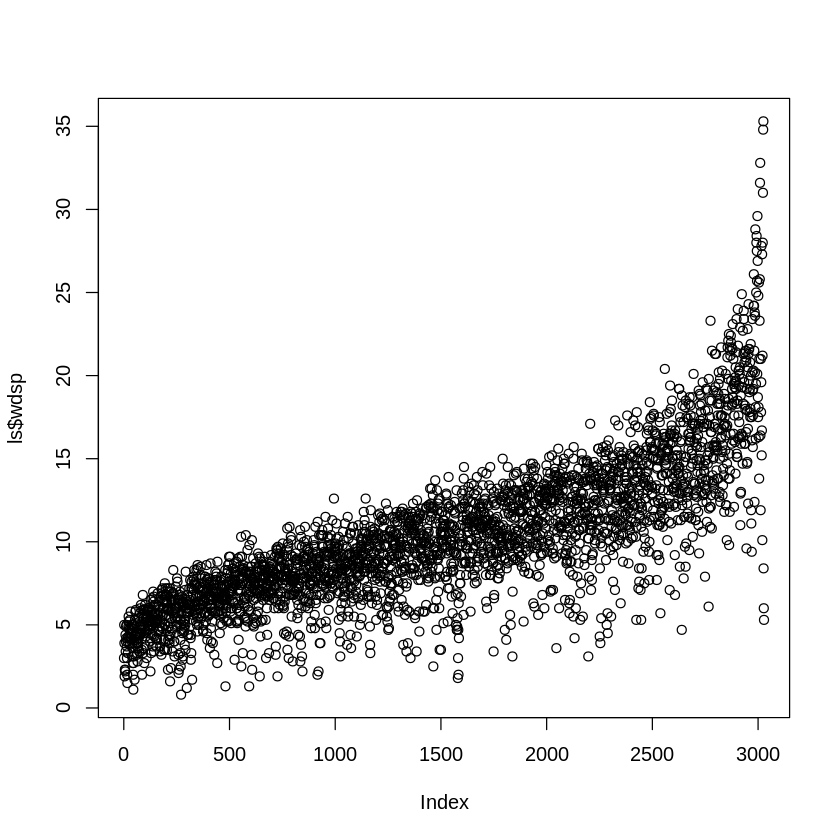

In [ ]:
plot(ls$wdsp)

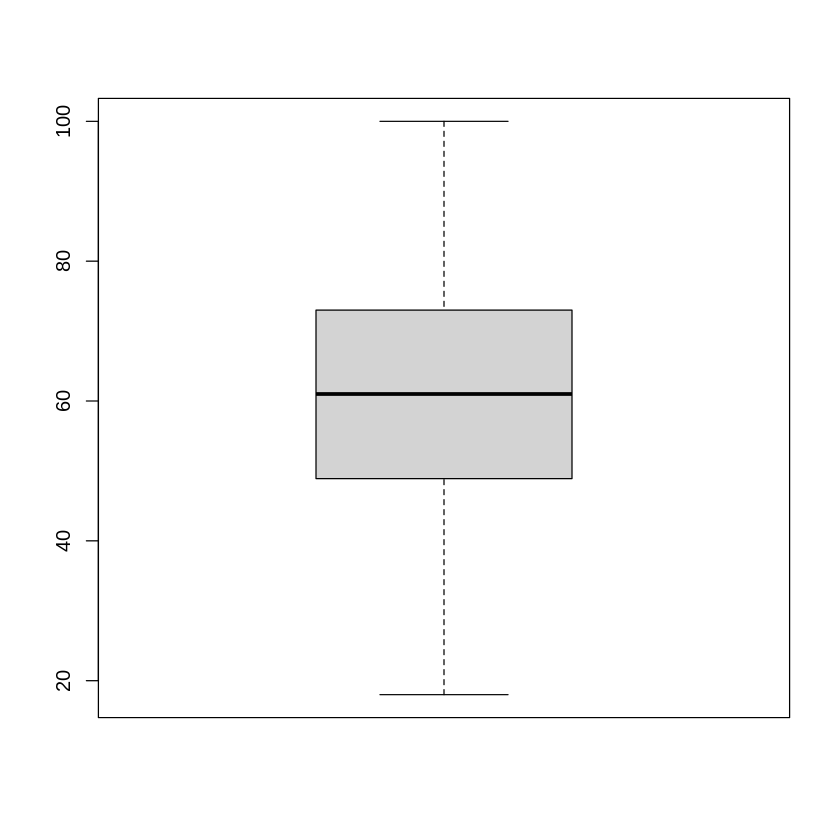

In [ ]:
boxplot(ls$max)

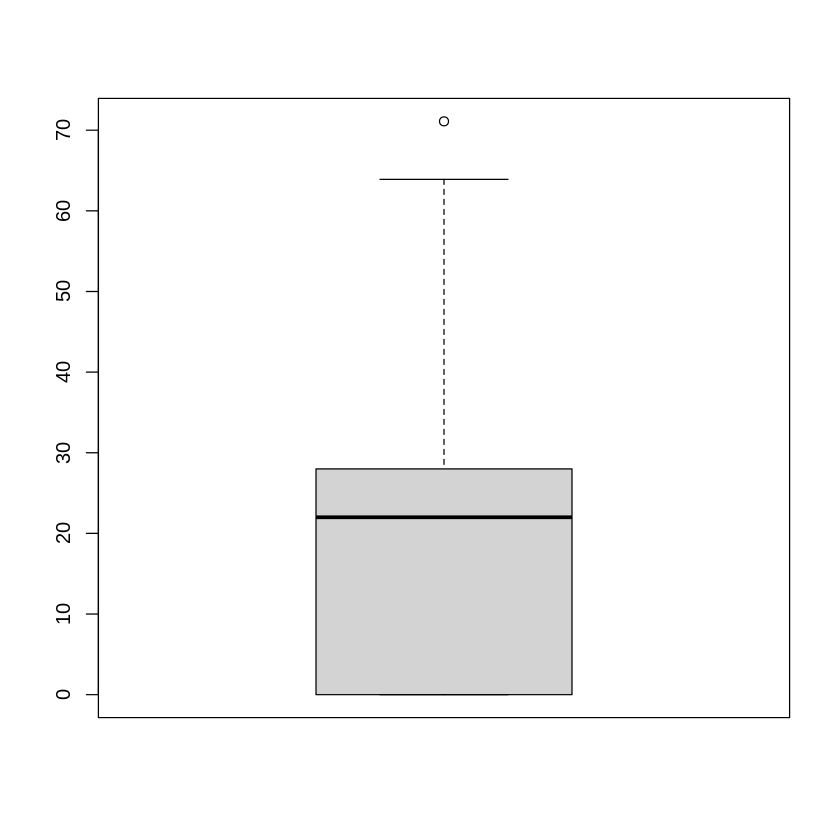

In [ ]:
boxplot(ls$gust)

Using the examples it is clear that the outliers to be removed should be prcp and wdsp, as they are both chosen to be used in the regressor test. Additionally they both have super high outlier values skewing the real outliers so they will be removed. 

In [ ]:
ls<- subset(ls, ls$wdsp < 99)
ls

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
9,2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,656


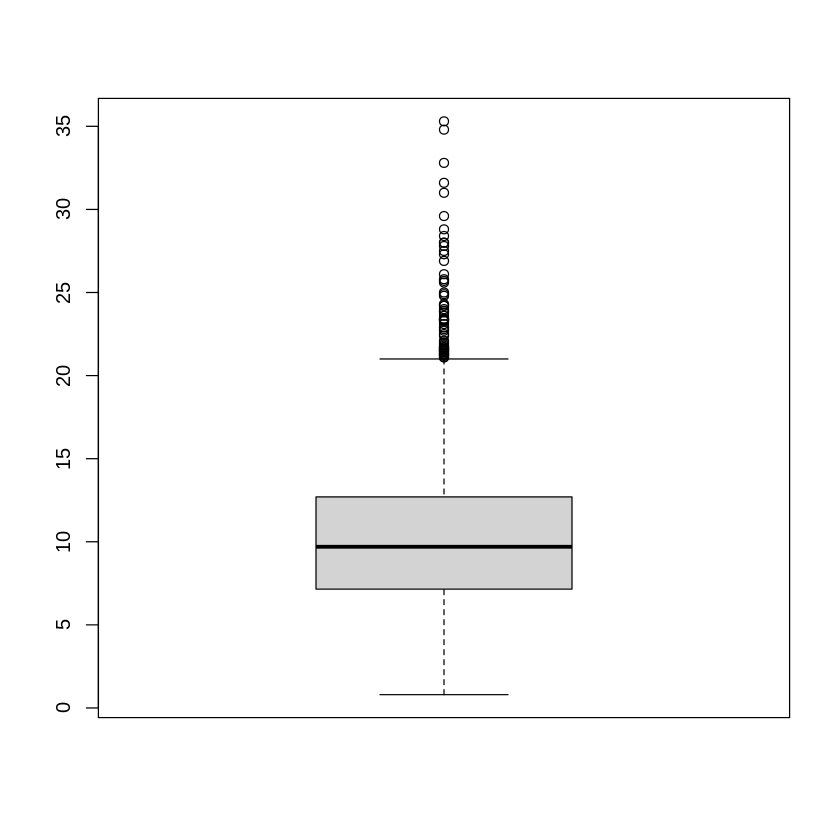

In [ ]:
boxplot(ls$wdsp)

In [ ]:
Q <- quantile(ls$wdsp, probs=c(0.25 ,0.60), na.rm = FALSE)
Q


25%    60% 
 7.175 10.800

In [ ]:
iqr <- IQR(ls$wdsp)
iqr


[1] 5.525

In [ ]:
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range﻿
up
low

60% 
19.0875

25% 
-1.1125

In [ ]:
ls<- subset(ls, ls$wdsp > (Q[1] - 1.5*iqr) & ls$wdsp < (Q[2]+1.5*iqr))
ls


,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
9,2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,656


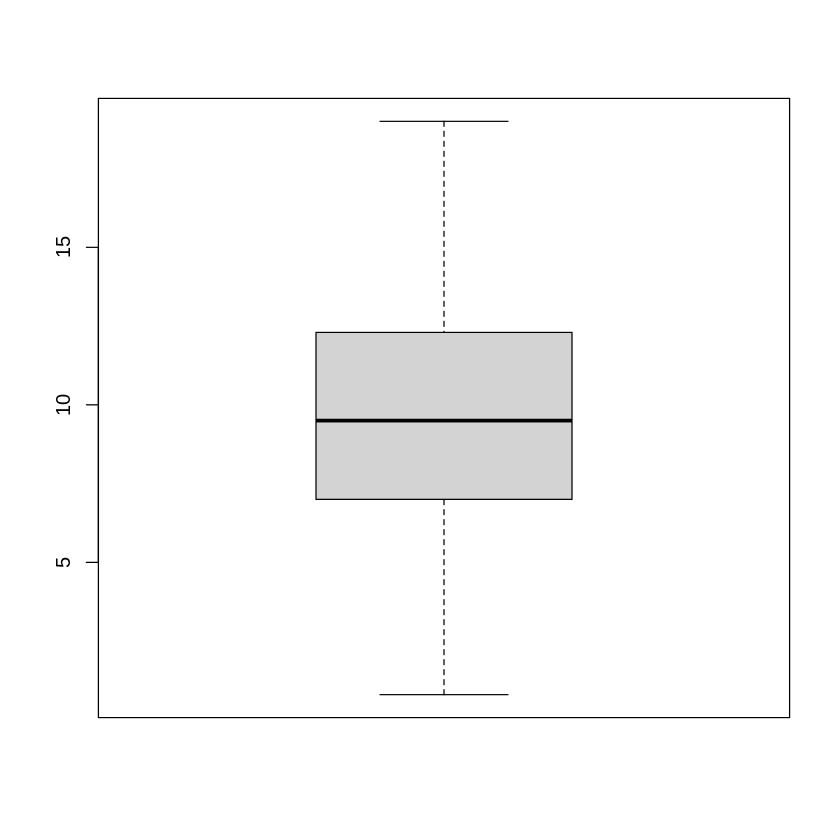

In [ ]:
boxplot(ls$wdsp)

In [ ]:
summary(lm(ls$NUM_COLLISIONS~ ls$temp + ls$wdsp + ls$max + ls$min + ls$prcp))


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$wdsp + ls$max + 
    ls$min + ls$prcp)

Residuals:
    Min      1Q  Median      3Q     Max 
-333.34  -61.75   11.52   76.41  288.24 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 473.9681    14.3338  33.066  < 2e-16 ***
ls$temp      -0.1428     0.8894  -0.161  0.87249    
ls$wdsp       2.7741     0.6246   4.441 9.28e-06 ***
ls$max        1.9927     0.6252   3.187  0.00145 ** 
ls$min       -0.8629     0.5526  -1.562  0.11851    
ls$prcp      -0.2880     0.1652  -1.744  0.08133 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.3 on 2904 degrees of freedom
Multiple R-squared:  0.01901,	Adjusted R-squared:  0.01732 
F-statistic: 11.25 on 5 and 2904 DF,  p-value: 9.09e-11


As can be seen accuracy has increased slightly. This data will be saved for version 3.

In [ ]:
write.csv(ls, "New_york_collisions_version3.csv", row.names=FALSE)


In [ ]:
Q <- quantile(ls$prcp, probs=c(0.25, 0.75), na.rm = FALSE)


Now the same will be done to prcp, however the results end up being worse. 

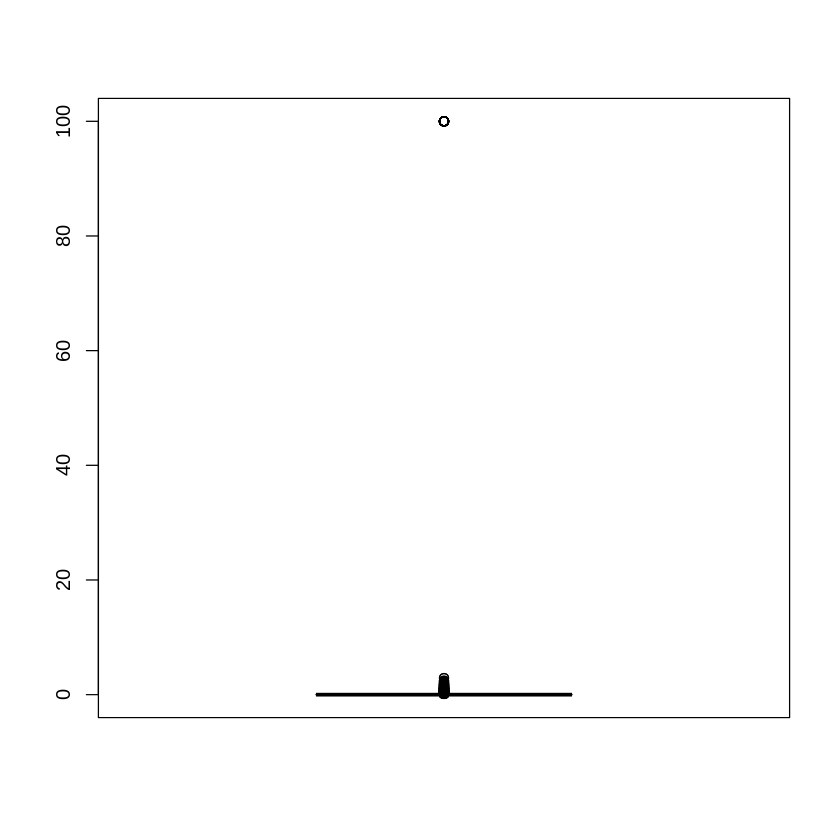

In [ ]:
boxplot(ls$prcp)

Removing the outliers at the top to gain a more accurate reading of what the outliers actually are. 

In [ ]:
ls<- subset(ls, ls$prcp < 99)
ls

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
9,2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,656


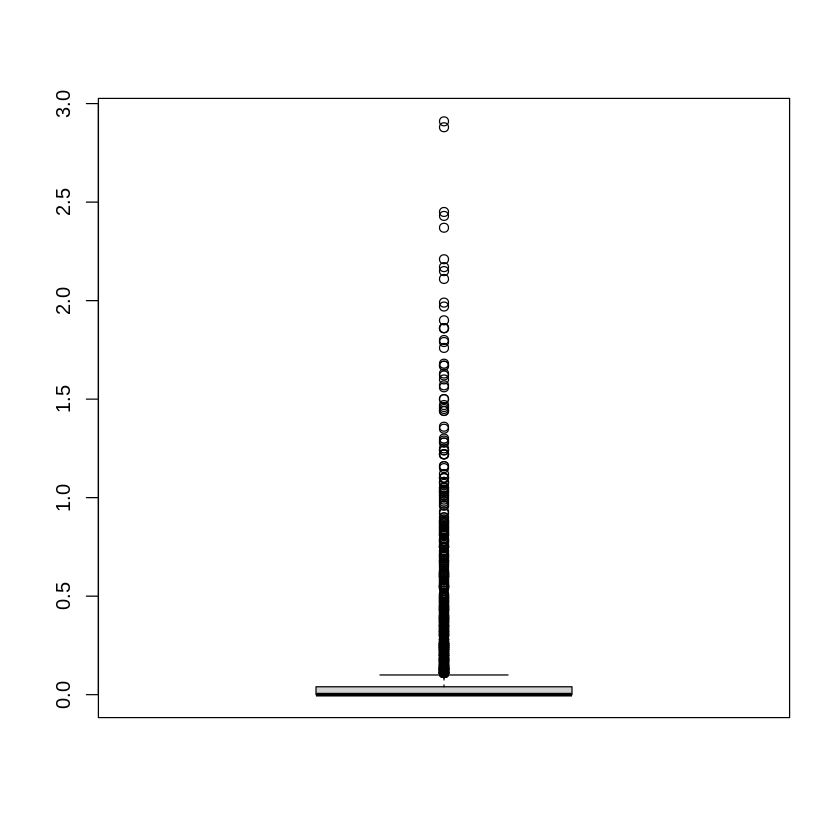

In [ ]:
boxplot(ls$prcp)

In [ ]:
iqr <- IQR(ls$prcp)
iqr

[1] 0.04

In [ ]:
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range﻿
up
low

75% 
0.11

25% 
-0.06

In [ ]:
ls<- subset(ls, ls$prcp > (Q[1] - 1.5*iqr) & ls$prcp < (Q[2]+1.5*iqr))
ls


,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,565
5,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,577
6,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,581
7,1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,452
8,4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,347
10,1,2014,11,10,2014-11-10,48.2,42.2,1019.2,9.6,4.0,7.0,0.0,59.0,39.0,0.00,0,560


In [ ]:
summary(lm(ls$NUM_COLLISIONS~ ls$temp + ls$max + ls$min + ls$wdsp))


Call:
lm(formula = ls$NUM_COLLISIONS ~ ls$temp + ls$max + ls$min + 
    ls$wdsp)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.10  -63.91    9.37   76.52  291.79 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 480.7053    16.0898  29.876  < 2e-16 ***
ls$temp      -0.8267     1.0073  -0.821 0.411888    
ls$max        2.3246     0.7207   3.225 0.001276 ** 
ls$min       -0.6132     0.6206  -0.988 0.323201    
ls$wdsp       2.5741     0.7352   3.501 0.000471 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 114 on 2309 degrees of freedom
Multiple R-squared:  0.01644,	Adjusted R-squared:  0.01474 
F-statistic: 9.651 on 4 and 2309 DF,  p-value: 9.709e-08


Somehow by removing the outliers the accuracy has decreased. Perhaps useful information was lost. The cleaned prcp will not be used. 

**Conclusion of wdsp and prcp cleaning**
When trying to remove outliers from wdsp and prcp i discovered something very strange. When the probabilities for quantile were accidentally set for (0, 0) meaning that only values between 0 and 8.9 would be kept when removing outliers for the wdsp the accuracy of the linear regressor vastly increased. This accuracy remained high when wdsp was removed, so i assume it was just a coincidence.
Not only that. but when trying to remove outliers by preserving only the results between 25% quantile - the interquartile range * 1.5 and 75% quantile + the interquantile range * 1.5 actually decreases the accuracy. Even just removing obvious outliers such as entries above 99 for prcp causes reduced accuracy. I have gained slightly increased accuracy by using the 60% quantile for wdsp for removing outliers, and am satisfied with the result. 

# Scaling the data

This using new york collisions version 3

In [ ]:
ls <- read.csv("https://raw.githubusercontent.com/agronemic/19004547DAOTW/main/New_york_collisions_version3.csv", stringsAsFactors = TRUE)

Towardsai (2019) states that standardisation is best when you know the shape of the distribution of the data is a bell curve, and that normalisation is best when the shape is either not known, or is known not to be a bell curve. 

The plan with this data is to standardise the number of collisions and normalise the features and to check if that increases the accuracy at all, if it does the scaled data will be kept. 

Since standardisation is best when the shape of the data is well known i will be using normalisation instead.

# Log normalisation

Log scale was a failure as it immediately worsened all results by a large amount. 

In [ ]:
ls[c(6 : 17)] = log(as.data.frame(ls[c(6 : 17)]))


Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”


In [ ]:
ls[c(6 : 17)]

temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.091006,3.916015,6.930886,2.3025851,1.0986123,1.629241,-Inf,4.357990,3.972177,-Inf,-Inf,6.163315
3.653252,3.538057,6.927754,2.2617631,1.6094379,1.945910,-Inf,3.871201,3.044522,-Inf,-Inf,6.692084
3.772761,3.414443,6.944858,2.3025851,1.3609766,1.945910,-Inf,3.912023,3.634951,-Inf,-Inf,6.234411
4.345103,4.127134,6.927460,2.3025851,0.6418539,1.945910,-Inf,4.430817,4.172848,-Inf,-Inf,6.336826
4.348987,4.097672,6.929223,2.3025851,0.8329091,1.945910,-Inf,4.477337,4.043051,-Inf,-Inf,6.357842
4.359270,4.242765,6.921264,2.2300144,0.8329091,1.945910,2.708050,4.477337,4.110874,-Inf,-Inf,6.364751
4.197202,3.871201,6.925890,2.3025851,0.7884574,1.945910,-Inf,4.343805,3.875359,-Inf,-Inf,6.113682
4.259859,4.241327,6.932545,-0.2231436,1.4816045,1.945910,-Inf,4.343805,4.203199,-Inf,0,5.849325
4.188138,4.178992,6.924416,0.9555114,1.2237754,1.945910,-Inf,4.343805,4.077537,-2.120264,0,6.486161


In [ ]:
scale_data <- (scale(ls$NUM_COLLISIONS))

# Standardisation

Automatic standardisation scaling in r seemingly had no results or any significant changes.

In [ ]:
ls[c(17)] <- scale(ls[c(17)])

This standardises all variables used for calculating the number of collisions. Whether this works will be tested.

In [ ]:
write.csv(ls, "New_york_collisions_version4StandardisedNCONLY.csv", row.names=FALSE)


In [ ]:
ls

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,"<dbl[,1]>"
7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.00,0,-0.87638136
4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.00,0,2.01945532
2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.00,0,-0.57017506
3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.00,0,-0.08899374
4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.00,0,0.01599127
4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15.0,88.0,61.0,0.00,0,0.05098628
1,2012,9,17,2012-09-17,66.5,48.0,1018.3,10.0,2.2,7.0,0.0,77.0,48.2,0.00,0,-1.07760264
4,2020,9,10,2020-09-10,70.8,69.5,1025.1,0.8,4.4,7.0,0.0,77.0,66.9,0.00,1,-1.99622153
2,2017,9,26,2017-09-26,65.9,65.3,1016.8,2.6,3.4,7.0,0.0,77.0,59.0,0.12,1,0.70714263


In [ ]:
scale_data

-0.76471741
1.63036659
-0.44268506
0.02120857
0.11640396
0.14769630
-0.98953074
-2.18695013
0.69762880
-0.01905434
0.42734014


In [ ]:
summary(lm(scale_data ~ ls$max))


Call:
lm(formula = scale_data ~ ls$max)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3747 -0.4245  0.1841  0.6630  2.0090 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.836e-16  1.848e-02   0.000        1    
ls$max      7.781e-02  1.849e-02   4.209 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9971 on 2908 degrees of freedom
Multiple R-squared:  0.006055,	Adjusted R-squared:  0.005713 
F-statistic: 17.71 on 1 and 2908 DF,  p-value: 2.644e-05


There are no increases in the overall accuracy of the line

In [ ]:
scale_max <- (scale(ls$max))

In [ ]:
summary(lm(scale_data ~ scale_max))


Call:
lm(formula = scale_data ~ scale_max)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3747 -0.4245  0.1841  0.6630  2.0090 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.056e-16  1.848e-02   0.000        1    
scale_max   7.781e-02  1.849e-02   4.209 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9971 on 2908 degrees of freedom
Multiple R-squared:  0.006055,	Adjusted R-squared:  0.005713 
F-statistic: 17.71 on 1 and 2908 DF,  p-value: 2.644e-05


# Min-Max normalisation

In [ ]:
install.packages('caret')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Warning message in install.packages("caret"):
“installation of package ‘clock’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘gower’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘ModelMetrics’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘plyr’ had non-zero exit status”


In [ ]:

library(caret)
process <- preProcess(as.data.frame(ls[c(17)]), method=c("range"))

ls[c(17)] <- predict(process, as.data.frame(ls[c(17)]))

In [ ]:
ls

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,2018,9,23,2018-09-23,0.6674907,0.005686247,0.003817599,1.00000000,0.12087912,0.1214286,0.0000000,0.7329268,0.7346667,0.00000000,0,0.34162521
4,2018,12,20,2018-12-20,0.4054388,0.004107289,0.003462473,0.95918367,0.23076923,0.1666667,0.0000000,0.3658537,0.3066667,0.00000000,0,0.89054726
2,2013,11,5,2013-11-05,0.4660074,0.003707553,0.005415663,1.00000000,0.17032967,0.1666667,0.0000000,0.3902439,0.5320000,0.00000000,0,0.39966833
3,2012,7,11,2012-07-11,0.8813350,0.006865469,0.003429180,1.00000000,0.06043956,0.1666667,0.0000000,0.8048780,0.8920000,0.00000000,0,0.49087894
4,2012,7,12,2012-07-12,0.8850433,0.006685588,0.003628938,1.00000000,0.08241758,0.1666667,0.0000000,0.8536585,0.7866667,0.00000000,0,0.51077944
4,2012,8,9,2012-08-09,0.8949320,0.007624968,0.002730027,0.92857143,0.08241758,0.1666667,0.2538071,0.8536585,0.8400000,0.00000000,0,0.51741294
1,2012,9,17,2012-09-17,0.7503090,0.005466392,0.003251617,1.00000000,0.07692308,0.1666667,0.0000000,0.7195122,0.6693333,0.00000000,0,0.30348259
4,2020,9,10,2020-09-10,0.8034611,0.007614974,0.004006259,0.06122449,0.19780220,0.1666667,0.0000000,0.7195122,0.9186667,0.00000000,1,0.12935323
2,2017,9,26,2017-09-26,0.7428925,0.007195251,0.003085152,0.24489796,0.14285714,0.1666667,0.0000000,0.7195122,0.8133333,0.00120012,1,0.64179104


In [ ]:
write.csv(ls, "New_york_collisions_version4normalised.csv", row.names=FALSE)


# Scaled data performance testing

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$temp)

In [ ]:
summary(results)

Using the top two highest performing variables in a linear regression model gives much better results.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$gust + ls$min + ls$temp)

In [ ]:
summary(results)

This combination of results gives a greater multiple r squared but a slightly higher p value .

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$min + ls$temp)

In [ ]:
summary(results)

This gives poor results as the multiple R-squared has actually decreased. 

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$min + ls$temp + ls$prcp)

In [ ]:
summary(results)

The residual standard error is still the same but the multiple r squared has decreased slightly. 



In [ ]:
results <- lm(ls$NUM_COLLISIONS~ls$max + ls$min + ls$temp + ls$prcp + ls$fog)

In [ ]:
summary(results)

The same overall results. It seems the multiple R-squared score to beat is stil a very low 0.01.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$slp + ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp + ls$fog)

In [ ]:
summary(results)

Using all possible variables the best results as of now. Removing variables like sea level pressure and fog will hopefully make it run better.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$slp + ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)

This gives a slightly worse multiple r squared, and a slightly better adjusted r squared. No real accuracy gains have been noted though. 

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$visib + ls$wdsp + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)

Removing sea level pressure improved: the results slightly further. Lastly wind speed will be removed

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$visib + ls$mxpsd + ls$gust + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)

This has actually made the results much worse. Wind speed will be kept for now, and prehaps mxpsd and gust will be removed instead. 

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$dewp + ls$wdsp + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)

The results have improved overall. The current lineup of variables seems like a decent selection, but maybe a smaller selection would perform better.

In [ ]:
results <- lm(ls$NUM_COLLISIONS~ ls$temp + ls$wdsp + ls$max + ls$min + ls$prcp)

In [ ]:
summary(results)

Removing dewp gives this selection of variables which offers excellent results. I believe using this selection of variables, and perhaps removing min, along with standardisation of what is left, might give some better accuracy results. 

AS can be seen no method of normalisation or standardisation gives better results, though log normalisation gave much worse results. 
Other ways of improving the results might be to remove outliers from other main variables, like wdsp, temp, and prcp 

# Conclusion


Though the overall accuracy is still very poor and there is perhaps more work to be done removing outliers there is still a solid base of evidence suggesting that wind speed, percipitation, and the maximum, minumum, and average recorded tempature has a positive correlation with the number of traffic incidents in new york. However flaws such as the lack of recorded snow make things difficult, and aspects such as wind speed seem to not have a great effect on the number of collisions in new york. This seems to correlate with other studies discussed at the start of the document, where wind speed isnt the strongest indicator of collisions, and instead rain and tempature has the highest correlation. Tempature was a strong correlation in this study as well, though that may be because tempature might have been easier to record with less messing entries than any other feature variable. The lack of wind speed affecting traffic in new york might be due to the high density of buildings within new york providing cover from the wind. And snow could have had a strong relevence to traffic collisions but the snowfall in new york was not recorded by the station that i used in the dataset. Even though prcp has not given much accuracy i will assume that it is still very relevant due to how wet roads have been shown to affect driving conditions as shown when looking at other similar studies at the start of this document. 
In conclusion the tempature, wind speed, and precipitation has been shown to have an impact on the number of collisions in new york and that these should be monitored by the emergency services to go on high alert when the tempature, windspeed, and precipitation is high. 

#Biliography 

Statisticsbyjim (2023) low r squared regression [online] https://statisticsbyjim.com/regression/low-r-squared-regression/ (accessed 17/03/2023)

Statisticsbyjim (2023) Multicollinearity in Regression Analysis: Problems, Detection, and Solutions [online] https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/ (accessed 17/03/2023)

digital ocean (2022) How to Normalize data in R [3 easy methods]
[online] https://www.digitalocean.com/community/tutorials/normalize-data-in-r (accessed 17/03/2023)

J. Davies (2023) Analysis of weather [online] effects on daily road accidents https://analysisfunction.civilservice.gov.uk/wp-content/uploads/2017/01/Road-accidents.pdf (accessed 17/03/2023)
 
towardsai (2019) How to improve the accuracy of a Regression Model [online] https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardizing%20the%20features%20around%20the,end%20up%20creating%20a%20bais. (accessed 17/03/2023)

Federal highway administration (2023) How Do Weather Events Impact Roads? [online]
https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm (accessed 17/03/2023)

towardsdatascience (2021) How to improve the accuracy of a Regression Model [online] https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604 (accessed 18/03/2023)

blumenshine law group (2023) how bad weather increases driving accidents [online] https://blumenshinelawgroup.com/how-bad-weather-increases-driving-accidents/ (accessed 19/03/2023)


Nico Becker, Henning W. Rust & Uwe Ulbrich (2022) Weather impacts on various types of road crashes: a quantitative analysis using generalized additive models https://etrr.springeropen.com/articles/10.1186/s12544-022-00561-2 (accessed 19/03/2023)

sobolaw winter driving accidents in new york (2021) [online] https://sobolaw.com/car-accident/winter-driving-accidents-in-new-york/ (accessed 19/03/2023)

datatricks (2020) Feature scaling in R: five simple methods
[online] https://datatricks.co.uk/feature-scaling-in-r-five-simple-methods (accessed 19/03/2023)

Medium (2020) How to Remove Outliers for Machine Learning?
 [online] https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-lSearning-24620c4657e8 (accessed 19/03/2023)

nyc Data science (2018) 
New York City Weather and Vehicle Collision Data Analysis by Hua Yang [online] https://nycdatascience.com/blog/student-works/new-york-city-weather-and-vehicle-collision-data-analysis/  (accessed 19/03/2023)












